In [1]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,}'.format
from pandas.plotting import autocorrelation_plot
from math import sqrt
import researchpy as rp
import scipy as sp
from scipy import stats
import scipy.signal
from scipy.signal import fftconvolve, convolve
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
import random as ran
from pprint import pprint

from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import *

from imblearn.over_sampling import SMOTE
from sklearn.calibration import CalibratedClassifierCV
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV, LogisticRegression
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer, ENGLISH_STOP_WORDS
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn import datasets
from xgboost import XGBClassifier, XGBRegressor
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
#from textacy.preprocess import preprocess_text

from gensim import corpora, models, matutils
from collections import defaultdict, Counter

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

import tensorflow as tf

import patsy
from itertools import combinations

import graphviz #conda install graphviz
import json
import requests
import urllib
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from time import sleep
import re
import twitter

/Users/yangweichle/opt/anaconda3/lib/python3.7/site-packages/dask/dataframe/utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
%matplotlib inline
#plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

## Build and document a working model, prototype, recommendation, or solution

The [Chicago Crime Data](https://console.cloud.google.com/marketplace/details/city-of-chicago-public-data/chicago-crime?filter=solution-type:dataset&id=a985ccaf-0a3a-4eb9-a2de-c4fd07de08f0)set is hosted in Google BigQuery. I retrieved this BigQuery data as a Pandas DataFrame and then exported the DataFrame as a CSV file which will be used in the data modeling.

### Chicago Crime Data
![ChicagoSeal](Images/ChicagoSeal.png)
City of Chicago <br>
Chicago Police Department crime data from 2001 to present

#### Overview

This dataset reflects reported incidents of crime (with the exception of murders where data exists for each victim) that occurred in the City of Chicago from 2001 to present, minus the most recent seven days. Data is extracted from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system. In order to protect the privacy of crime victims, addresses are shown at the block level only and specific locations are not identified.

This data includes unverified reports supplied to the Police Department. The preliminary crime classifications may be changed at a later date based upon additional investigation and there is always the possibility of mechanical or human error. Therefore, the Chicago Police Department does not guarantee (either expressed or implied) the accuracy, completeness, timeliness, or correct sequencing of the information. The information should not be used for comparison purposes over time.

<table style="width:100%;">
<colgroup>
<col width="15%" />
<col width="10%" />
<col width="10%" />
<col width="65%" />
</colgroup>
<thead>
<tr class="header">
<th align="left">Field name</th>
<th align="left">Type</th>
<th align="left">Mode</th>
<th align="left">Description</th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td align="left">unique_key</td>
<td align="right">INTEGER</td>
<td align="left">REQUIRED</td>
<td align="left">Unique identifier for the record.</td>
</tr>
<tr class="even">
<td align="left">case_number</td>
<td align="left">STRING</td>
<td align="left">NULLABLE</td>
<td align="left">The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.</td>
</tr>
<tr class="odd">
<td align="left">date</td>
<td align="left">TIMESTAMP</td>
<td align="left">NULLABLE</td>
<td align="left">Date when the incident occurred. this is sometimes a best estimate.</td>
</tr> 
<tr class="even">
<td align="left">block</td>
<td align="left">STRING</td>
<td align="left">NULLABLE</td>
<td align="left">The partially redacted address where the incident occurred, placing it on the same block as the actual address.</td>
</tr> 
<tr class="odd">
<td align="left">iucr</td>
<td align="left">STRING</td>
<td align="left">NULLABLE</td>
<td align="left">The Illinois Unifrom Crime Reporting code. This is directly linked to the Primary Type and Description. See the list of IUCR codes at https://data.cityofchicago.org/d/c7ck-438e.</td>
</tr> 
<tr class="even">
<td align="left">primary_type</td>
<td align="left">STRING</td>
<td align="left">NULLABLE</td>
<td align="left">The primary description of the IUCR code.</td>
</tr>
<tr class="odd">
<td align="left">description</td>
<td align="left">STRING</td>
<td align="left">NULLABLE</td>
<td align="left">The secondary description of the IUCR code, a subcategory of the primary description.</td>
</tr> 
<tr class="even">
<td align="left">location_description</td>
<td align="left">STRING</td>
<td align="left">NULLABLE</td>
<td align="left">Description of the location where the incident occurred.</td>
</tr>
<tr class="odd">
<td align="left">arrest</td>
<td align="left">BOOLEAN</td>
<td align="left">NULLABLE</td>
<td align="left">Indicates whether an arrest was made.</td>
</tr> 
<tr class="even">
<td align="left">domestic</td>
<td align="left">BOOLEAN</td>
<td align="left">NULLABLE</td>
<td align="left">Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.</td>
</tr>
<tr class="odd">
<td align="left">beat</td>
<td align="left">INTEGER</td>
<td align="left">NULLABLE</td>
<td align="left">Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts. See the beats at https://data.cityofchicago.org/d/aerh-rz74.</td>
</tr> 
<tr class="even">
<td align="left">district</td>
<td align="left">INTEGER</td>
<td align="left">NULLABLE</td>
<td align="left">Indicates the police district where the incident occurred. See the districts at https://data.cityofchicago.org/d/fthy-xz3r.</td>
</tr>
<tr class="odd">
<td align="left">ward</td>
<td align="left">INTEGER</td>
<td align="left">NULLABLE</td>
<td align="left">The ward (City Council district) where the incident occurred. See the wards at https://data.cityofchicago.org/d/sp34-6z76.</td>
</tr> 
<tr class="even">
<td align="left">community_area</td>
<td align="left">INTEGER</td>
<td align="left">NULLABLE</td>
<td align="left">Indicates the community area where the incident occurred. Chicago has 77 community areas. See the community areas at https://data.cityofchicago.org/d/cauq-8yn6.</td>
</tr>
<tr class="odd">
<td align="left">fbi_code</td>
<td align="left">STRING</td>
<td align="left">NULLABLE</td>
<td align="left">Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS). See the Chicago Police Department listing of these classifications at http://gis.chicagopolice.org/clearmap_crime_sums/crime_types.html.</td>
</tr> 
<tr class="even">
<td align="left">x_coordinate</td>
<td align="left">FLOAT</td>
<td align="left">NULLABLE</td>
<td align="left">The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.</td>
</tr>
<tr class="odd">
<td align="left">y_coordinate</td>
<td align="left">STRING</td>
<td align="left">NULLABLE</td>
<td align="left">The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.</td>
</tr> 
<tr class="even">
<td align="left">year</td>
<td align="left">INTEGER</td>
<td align="left">NULLABLE</td>
<td align="left">Year the incident occurred.</td>
</tr>
<tr class="odd">
<td align="left">updated_on</td>
<td align="left">TIMESTAMP</td>
<td align="left">NULLABLE</td>
<td align="left">Date and time the record was last updated.</td>
</tr> 
<tr class="even">
<td align="left">latitude</td>
<td align="left">FLOAT</td>
<td align="left">NULLABLE</td>
<td align="left">The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.</td>
</tr>
<tr class="odd">
<td align="left">longitude</td>
<td align="left">FLOAT</td>
<td align="left">NULLABLE</td>
<td align="left">The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.</td>
</tr>
<tr class="even">
<td align="left">location</td>
<td align="left">STRING</td>
<td align="left">NULLABLE</td>
<td align="left">The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.</td>
</tr>
</tbody>
</table>

### Reading a File

In [3]:
# Create data path variable for loading data
data_path = '/Users/yangweichle/Documents/Employment/TRAINING/DATA SCIENCE/PROJECTS/ClassifyingCriminalOffenses/GCP BigQuery API_Python/Datasets/'

In [4]:
# Read file into DataFrame
# Note: header=0 disables the header from the file
#       dtype: type name or dict of column -> type, default None; data type for data or columns;
#              e.g. {'a': np.float64, 'b': np.int32}; use 'str' or 'object' together with suitable 'na_values' settings
#              to preserve and not interpret dtype
chicago_crime = pd.read_csv(data_path + 'chicago_crime.csv', header=0, 
                            dtype={'iucr': 'object', 'fbi_code': 'object'}) # Comma-separated values file

### Examine the DataFrame

In [5]:
# Return the number of rows and columns (dimensionality) of the DataFrame
print('Rows: {}, Cols: {}'.format(chicago_crime.shape[0], chicago_crime.shape[1]))

Rows: 6876354, Cols: 22


In [6]:
# Print a concise summary of a DataFrame including the index dtype and column dtypes, non-null values, and memory usage
# Note: Useful to quickly see if null values exist
#       show_counts: whether to show the non-null counts
chicago_crime.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6876354 entries, 0 to 6876353
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   unique_key            6876354 non-null  int64  
 1   case_number           6876350 non-null  object 
 2   date                  6876354 non-null  object 
 3   block                 6876354 non-null  object 
 4   iucr                  6876354 non-null  object 
 5   primary_type          6876354 non-null  object 
 6   description           6876354 non-null  object 
 7   location_description  6871341 non-null  object 
 8   arrest                6876354 non-null  bool   
 9   domestic              6876354 non-null  bool   
 10  beat                  6876354 non-null  int64  
 11  district              6876307 non-null  float64
 12  ward                  6261530 non-null  float64
 13  community_area        6262858 non-null  float64
 14  fbi_code              6876354 non-

In [7]:
# Column names (which is "an index")
chicago_crime.columns

Index(['unique_key', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',
       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude',
       'location'],
      dtype='object')

In [8]:
# Sort a DataFrame by multiple columns
# Note: ascending: sort ascending vs. descending; ascending=True is default
#       inplace=True changes the original DataFrame
#chicago_crime.sort_values(by=['X', 'Y'], ascending=True, inplace=True)

In [9]:
# Print the first 5 rows and the last 5 rows of the DataFrame
chicago_crime.head().append(chicago_crime.tail())

,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,11691617,JC264900,2019-05-15 19:00:00+00:00,095XX S AVALON AVE,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,RESIDENCE,False,True,...,8.0,50.0,08B,"1,186,206.0","1,841,979.0",2019,2019-05-22 16:12:53+00:00,41.721514573,-87.593555694,"(41.721514573, -87.593555694)"
1,11679177,JC252697,2019-05-06 20:09:00+00:00,052XX S WELLS ST,4651,OTHER OFFENSE,SEX OFFENDER: FAIL REG NEW ADD,RESIDENCE,False,False,...,3.0,37.0,26,"1,175,491.0","1,870,242.0",2019,2019-05-13 16:13:25+00:00,41.79931753,-87.631958462,"(41.79931753, -87.631958462)"
2,11673919,JC246944,2019-05-02 15:22:00+00:00,033XX W FOSTER AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,SIDEWALK,True,False,...,39.0,13.0,24,"1,152,975.0","1,934,347.0",2019,2019-05-09 16:13:26+00:00,41.975702619,-87.71283079,"(41.975702619, -87.71283079)"
3,11638281,JC203800,2019-03-29 08:45:00+00:00,087XX S STONY ISLAND AVE,0497,BATTERY,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,PARKING LOT/GARAGE(NON.RESID.),False,True,...,8.0,48.0,04B,"1,188,323.0","1,847,328.0",2019,2019-04-05 16:07:16+00:00,41.736142605,-87.585631434,"(41.736142605, -87.585631434)"
4,24442,JC195241,2019-03-22 11:55:00+00:00,101XX S AVENUE L,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,10.0,52.0,01A,"1,201,819.0","1,838,463.0",2019,2019-03-29 16:12:07+00:00,41.711483998,-87.536488614,"(41.711483998, -87.536488614)"
6876349,9166040,HW310535,2013-06-06 15:00:00+00:00,060XX N SHERIDAN RD,5002,OTHER OFFENSE,OTHER VEHICLE OFFENSE,STREET,False,False,...,48.0,77.0,26,"1,168,537.0","1,940,249.0",2013,2018-02-10 15:50:01+00:00,41.99157427,-87.655431953,"(41.99157427, -87.655431953)"
6876350,3206367,HK220099,2004-03-02 21:00:00+00:00,010XX W HOLLYWOOD AVE,5002,OTHER OFFENSE,OTHER VEHICLE OFFENSE,STREET,True,False,...,48.0,77.0,26,"1,168,363.0","1,938,040.0",2004,2018-02-28 15:56:25+00:00,41.985516503,-87.65613622,"(41.985516503, -87.65613622)"
6876351,2731927,HJ366343,2003-05-16 03:30:00+00:00,011XX W ARDMORE AVE,5002,OTHER OFFENSE,OTHER VEHICLE OFFENSE,STREET,False,False,...,48.0,77.0,26,"1,167,665.0","1,938,683.0",2003,2018-02-10 15:50:01+00:00,41.987296026,-87.658684774,"(41.987296026, -87.658684774)"
6876352,3068260,HJ786844,2003-11-23 21:00:00+00:00,059XX N CLARK ST,5002,OTHER OFFENSE,OTHER VEHICLE OFFENSE,STREET,False,False,...,40.0,77.0,26,"1,164,605.0","1,939,296.0",2003,2018-02-28 15:56:25+00:00,41.989043709,-87.669922058,"(41.989043709, -87.669922058)"
6876353,3841807,HL214136,2005-03-03 23:40:00+00:00,056XX N RIDGE AVE,5002,OTHER OFFENSE,OTHER VEHICLE OFFENSE,PARKING LOT/GARAGE(NON.RESID.),True,False,...,48.0,77.0,26,"1,167,084.0","1,937,517.0",2005,2018-02-28 15:56:25+00:00,41.984109031,-87.660855375,"(41.984109031, -87.660855375)"


#### Identifying important columns to include in the DataFrame.

In [10]:
# Select multiple columns
include_cols = ['date', 'block', 'iucr', 'primary_type', 'description', 'location_description', 'arrest', 'domestic',
                'beat', 'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate', 'y_coordinate', 'year',
                'updated_on', 'latitude', 'longitude', 'location'] 
chicago_crime = chicago_crime[include_cols]

In [11]:
# Return the number of rows and columns (dimensionality) of the DataFrame
print('Rows: {}, Cols: {}'.format(chicago_crime.shape[0], chicago_crime.shape[1]))

Rows: 6876354, Cols: 20


In [12]:
# Print the first 5 rows of the DataFrame
chicago_crime.head()

,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,2019-05-15 19:00:00+00:00,095XX S AVALON AVE,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,RESIDENCE,False,True,511,5.0,8.0,50.0,08B,"1,186,206.0","1,841,979.0",2019,2019-05-22 16:12:53+00:00,41.721514573,-87.593555694,"(41.721514573, -87.593555694)"
1,2019-05-06 20:09:00+00:00,052XX S WELLS ST,4651,OTHER OFFENSE,SEX OFFENDER: FAIL REG NEW ADD,RESIDENCE,False,False,935,9.0,3.0,37.0,26,"1,175,491.0","1,870,242.0",2019,2019-05-13 16:13:25+00:00,41.79931753,-87.631958462,"(41.79931753, -87.631958462)"
2,2019-05-02 15:22:00+00:00,033XX W FOSTER AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,SIDEWALK,True,False,1712,17.0,39.0,13.0,24,"1,152,975.0","1,934,347.0",2019,2019-05-09 16:13:26+00:00,41.975702619,-87.71283079,"(41.975702619, -87.71283079)"
3,2019-03-29 08:45:00+00:00,087XX S STONY ISLAND AVE,0497,BATTERY,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,PARKING LOT/GARAGE(NON.RESID.),False,True,412,4.0,8.0,48.0,04B,"1,188,323.0","1,847,328.0",2019,2019-04-05 16:07:16+00:00,41.736142605,-87.585631434,"(41.736142605, -87.585631434)"
4,2019-03-22 11:55:00+00:00,101XX S AVENUE L,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,432,4.0,10.0,52.0,01A,"1,201,819.0","1,838,463.0",2019,2019-03-29 16:12:07+00:00,41.711483998,-87.536488614,"(41.711483998, -87.536488614)"


In [13]:
# Convert a string to the datetime format
# Note: This is often slow -- consider doing it in the read_csv() method
chicago_crime['date'] = pd.to_datetime(chicago_crime['date']).dt.date
chicago_crime['date'] = pd.to_datetime(chicago_crime['date'])
type(chicago_crime.date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
# Rename one or more columns in the original DataFrame rather than returning a new view
chicago_crime = chicago_crime.rename(columns={'location': 'lat_long'})

In [15]:
# Print a concise summary of a DataFrame including the index dtype and column dtypes, non-null values, and memory usage
# Note: Useful to quickly see if null values exist
#       show_counts: whether to show the non-null counts
chicago_crime.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6876354 entries, 0 to 6876353
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   date                  6876354 non-null  datetime64[ns]
 1   block                 6876354 non-null  object        
 2   iucr                  6876354 non-null  object        
 3   primary_type          6876354 non-null  object        
 4   description           6876354 non-null  object        
 5   location_description  6871341 non-null  object        
 6   arrest                6876354 non-null  bool          
 7   domestic              6876354 non-null  bool          
 8   beat                  6876354 non-null  int64         
 9   district              6876307 non-null  float64       
 10  ward                  6261530 non-null  float64       
 11  community_area        6262858 non-null  float64       
 12  fbi_code              6876354 non-null  ob

### Examine Missing Values

In [16]:
# Count the missing values in each column of a DataFrame - sum() works because True is 1 and False is 0
null_counts = chicago_crime.isnull().sum()
total_counts = chicago_crime.isnull().count()
missing_percentage = round(null_counts/total_counts*100, 2)
missing_df = pd.DataFrame({'null_count': null_counts, 'percentage': missing_percentage})
missing_df[missing_df.null_count > 0]

,null_count,percentage
location_description,5013,0.07
district,47,0.0
ward,614824,8.94
community_area,613496,8.92
x_coordinate,64983,0.95
y_coordinate,64983,0.95
latitude,64983,0.95
longitude,64983,0.95
lat_long,64983,0.95


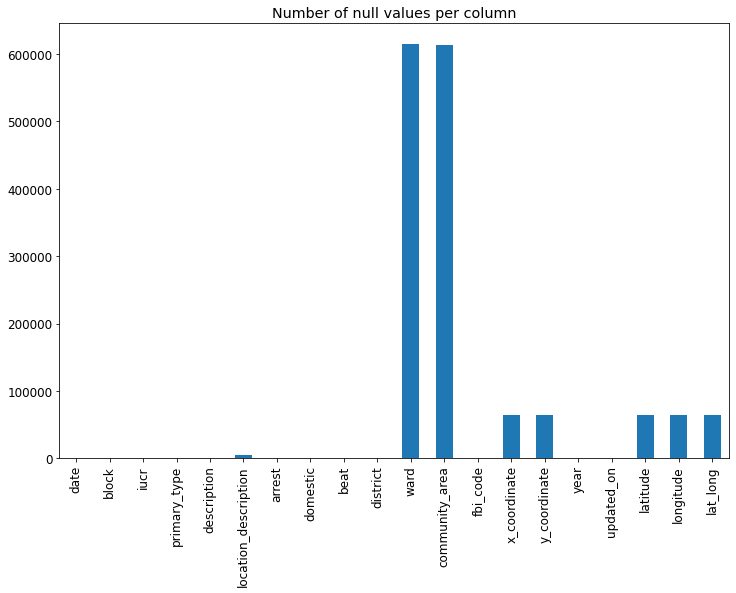

In [17]:
# Create a vertical bar plot by number of missing values per column using matplotlib
# Note: figsize: a tuple (width, height) in inches
chicago_crime.isnull().sum().plot.bar();
plt.title('Number of null values per column');

### Examine the Columns

In [18]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
def value_counts_func(df, var, bar, title=''):
    value_counts = df[var].value_counts(dropna=False)
    value_percents = round(df[var].value_counts(normalize=True, dropna=False)*100, 2)
    df_ = pd.DataFrame({'counts': value_counts, 'percentage': value_percents}).rename_axis(var).reset_index()
    
    if bar:
        # Create a vertical bar plot
        # Note: figsize: a tuple (width, height) in inches
        #       rot: rotation for ticks (xticks for vertical, yticks for horizontal plots)
        percents = df[var].value_counts(normalize=True, dropna=False)*100
        ax = percents.plot(kind='bar', figsize=(10, 6), rot=0);
        ax.set_title(title);
        ax.set_ylabel('Percentage');

    format_dict = {'percentage': '{:.2f}'}
    return df_.style.format(format_dict).hide_index()

In [19]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'primary_type', bar=False)

primary_type,counts,percentage
THEFT,1448232,21.06
BATTERY,1256079,18.27
CRIMINAL DAMAGE,784264,11.41
NARCOTICS,718354,10.45
ASSAULT,428501,6.23
OTHER OFFENSE,427465,6.22
BURGLARY,392857,5.71
MOTOR VEHICLE THEFT,318907,4.64
DECEPTIVE PRACTICE,272813,3.97
ROBBERY,259579,3.77


#### Drop non-criminal observations

In [20]:
# Return elements, either from `x` or `y`, depending on `condition`
chicago_crime['non_criminal'] = np.where(chicago_crime.primary_type.isin(['NON-CRIMINAL', 'NON - CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)']), 1, 0)

In [21]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'non_criminal', bar=False)

non_criminal,counts,percentage
0,6876137,100.00
1,217,0.00


In [22]:
# Excluding non-criminal values
chicago_crime = chicago_crime[chicago_crime.non_criminal == 0]

# Remove columns by specifying directly column names
# Note: inplace=True changes the original DataFrame
chicago_crime.drop(columns=['non_criminal'], inplace=True)

In [23]:
# Return the number of rows and columns (dimensionality) of the DataFrame
print('Rows: {}, Cols: {}'.format(chicago_crime.shape[0], chicago_crime.shape[1]))

Rows: 6876137, Cols: 20


#### Combining 'OTHER NARCOTIC VIOLATION' with 'NARCOTICS'
#### Combining 'DOMESTIC VIOLENCE' with 'ASSAULT'

In [24]:
# Replace values in a column
# Note: to_replace: how to find the values that will be replaced
#       inplace=True changes the original DataFrame
#chicago_crime.primary_type.replace('OTHER NARCOTIC VIOLATION', 'NARCOTICS', inplace=True)
chicago_crime.replace(to_replace={'primary_type': {'OTHER NARCOTIC VIOLATION': 'NARCOTICS', 
                                                   'DOMESTIC VIOLENCE': 'ASSAULT'}}, inplace=True)

In [25]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'primary_type', bar=False)

primary_type,counts,percentage
THEFT,1448232,21.06
BATTERY,1256079,18.27
CRIMINAL DAMAGE,784264,11.41
NARCOTICS,718480,10.45
ASSAULT,428502,6.23
OTHER OFFENSE,427465,6.22
BURGLARY,392857,5.71
MOTOR VEHICLE THEFT,318907,4.64
DECEPTIVE PRACTICE,272813,3.97
ROBBERY,259579,3.78


[Chicago Police Department - Illinois Uniform Crime Reporting (IUCR) Codes](https://data.cityofchicago.org/Public-Safety/Chicago-Police-Department-Illinois-Uniform-Crime-R/c7ck-438e)

IUCR codes are four digit codes that law enforcement agencies use to classify criminal incidents when taking individual reports. These codes are also used to aggregate types of cases for statistical purposes. In Illinois, the Illinois State Police establish IUCR codes, but the agencies can add codes to suit their individual needs. The Chicago Police Department currently uses more than 350 IUCR codes to classify criminal offenses, divided into “Index” and “Non-Index” offenses. Index offenses are the offenses that are collected nation-wide by the Federal Bureaus of Investigation’s Uniform Crime Reports program to document crime trends over time (data released semi-annually), and include murder, criminal sexual assault, robbery, aggravated assault & battery, burglary, theft, motor vehicle theft, and arson. Non-index offenses are all other types of criminal incidents, including vandalism, weapons violations, public peace violations, etc.

Note: `iucr` will be used to define an Index/Non-Index offense variable.

In [26]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'iucr', bar=False)

iucr,counts,percentage
0820,557719,8.11
0486,528876,7.69
0460,510721,7.43
1320,368506,5.36
1310,361146,5.25
0810,355390,5.17
0560,297211,4.32
1811,277353,4.03
0610,265849,3.87
0910,250413,3.64


#### Create indicators for Index/Non-Index offense based on CSV file: [Chicago Police Department - Illinois Uniform Crime Reporting (IUCR) Codes](https://data.cityofchicago.org/Public-Safety/Chicago-Police-Department-Illinois-Uniform-Crime-R/c7ck-438e).

In [27]:
# Return elements, either from `x` or `y`, depending on `condition`
chicago_crime['index_offense'] = np.where(chicago_crime.iucr.isin(['0110', '0130', '0261', '0262', '0263', '0264',
                                                                   '0265', '0266', '0271', '0272', '0273', '0274',
                                                                   '0275', '0281', '0291', '0312', '0313', '031A',
                                                                   '031B', '0320', '0325', '0326', '0330', '0331',
                                                                   '0334', '0337', '033A', '033B', '0340', '041A',
                                                                   '041B', '0420', '0430', '0450', '0451', '0452',
                                                                   '0453', '0461', '0462', '0479', '0480', '0481',
                                                                   '0482', '0483', '0485', '0487', '0488', '0489',
                                                                   '0490', '0491', '0492', '0493', '0495', '0496',
                                                                   '0497', '0498', '0510', '051A', '051B', '0520',
                                                                   '0530', '0550', '0551', '0552', '0553', '0555',
                                                                   '0556', '0557', '0558', '0610', '0620', '0630',
                                                                   '0650', '0810', '0820', '0850', '0860', '0865',
                                                                   '0870', '0880', '0890', '0895', '0910', '0915',
                                                                   '0917', '0918', '0920', '0925', '0927', '0928',
                                                                   '0930', '0935', '0937', '0938', '1010', '1020',
                                                                   '1025', '1090', '1753', '1754']), 1, 0)

index_offense,counts,percentage
0,4177733,60.76
1,2698404,39.24


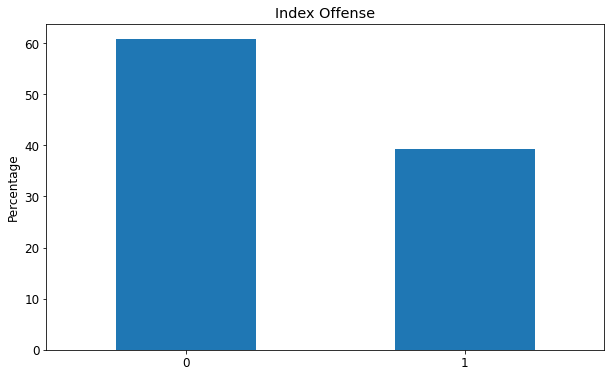

In [28]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'index_offense', bar=True, title='Index Offense')

In [29]:
# Return elements, either from `x` or `y`, depending on `condition`
chicago_crime['nonindex_offense'] = np.where(chicago_crime.iucr.isin(['0141', '0142', '0440', '0454', '0460', '0470',
                                                                      '0475', '0484', '0486', '0494', '0545', '0554', 
                                                                      '0560', '0580', '0581', '0583', '0584', '1030',
                                                                      '1035', '1050', '1055', '1110', '1120', '1121',
                                                                      '1122', '1130', '1135', '1140', '1150', '1151',
                                                                      '1152', '1153', '1154', '1155', '1156', '1160',
                                                                      '1170', '1185', '1195', '1200', '1205', '1206',
                                                                      '1210', '1220', '1230', '1235', '1240', '1241',
                                                                      '1242', '1245', '1255', '1260', '1624', '1261',
                                                                      '1265', '1305', '1310', '1320', '1330', '1335',
                                                                      '1340', '1345', '1350', '1360', '1365', '1370',
                                                                      '1375', '141A', '141B', '141C', '142A', '142B',
                                                                      '1435', '143A', '143B', '143C', '1440', '1450',
                                                                      '1460', '1475', '1476', '1477', '1478', '1479',
                                                                      '1480', '1481', '1505', '1506', '1507', '1510',
                                                                      '1511', '1512', '1513', '1515', '1520', '1521',
                                                                      '1525', '1526', '1530', '1531', '1535', '1536',
                                                                      '1537', '1540', '1541', '1542', '1544', '1549',
                                                                      '1562', '1563', '1564', '1565', '1566', '1570',
                                                                      '1572', '1574', '1576', '1578', '1580', '1582',
                                                                      '1585', '1590', '1610', '1611', '1620', '1621',
                                                                      '1622', '1623', '1625', '1626', '1627', '1630',
                                                                      '1631', '1632', '1633', '1640', '1650', '1651',
                                                                      '1661', '1670', '1680', '1681', '1682', '1690',
                                                                      '1691', '1692', '1693', '1694', '1695', '1696',
                                                                      '1697', '1710', '1715', '1720', '1725', '1750',
                                                                      '1751', '1752', '1755', '1775', '1780', '1790',
                                                                      '1791', '1792', '1811', '1812', '1821', '1822',
                                                                      '1840', '1850', '1860', '1900', '2010', '2011',
                                                                      '2012', '2013', '2014', '2015', '2016', '2017',
                                                                      '2018', '2019', '2020', '2021', '2022', '2023',
                                                                      '2024', '2025', '2026', '2027', '2028', '2029',
                                                                      '2030', '2031', '2032', '2033', '2034', '2040',
                                                                      '2050', '2060', '2070', '2080', '2090', '2091',
                                                                      '2092', '2093', '2094', '2095', '2110', '2111',
                                                                      '2120', '2160', '2170', '2210', '2220', '2230',
                                                                      '2240', '2250', '2251', '2500', '2820', '2825',
                                                                      '2826', '2830', '2840', '2850', '2851', '2860',
                                                                      '2870', '2890', '2895', '2900', '3000', '3100',
                                                                      '3200', '3300', '3400', '3610', '3710', '3720',
                                                                      '3730', '3731', '3740', '3750', '3751', '3760',
                                                                      '3770', '3800', '3910', '3920', '3960', '3966',
                                                                      '3970', '3975', '3980', '4210', '4220', '4230',
                                                                      '4240', '4255', '4310', '4386', '4387', '4388',
                                                                      '4389', '4410', '4420', '4510', '4625', '4650',
                                                                      '4651', '4652', '4740', '4750', '4800', '4810',
                                                                      '4860', '5000', '5001', '5002', '5003', '5004',
                                                                      '5007', '5009', '500E', '500N', '5011', '501A',
                                                                      '501H', '502P', '502R', '502T', '5110', '5111',
                                                                      '5112', '5120', '5121', '5122', '5130', '5131',
                                                                      '5132']), 1, 0)

nonindex_offense,counts,percentage
1,4110316,59.78
0,2765821,40.22


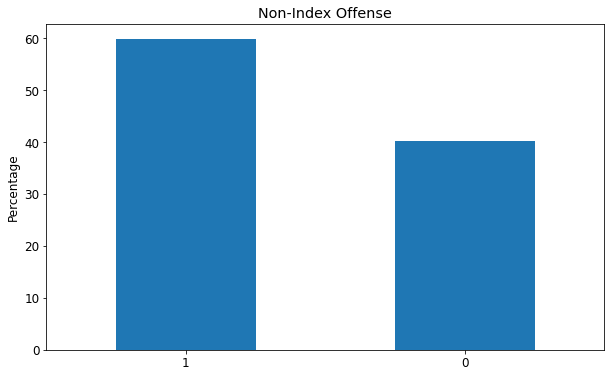

In [30]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'nonindex_offense', bar=True, title='Non-Index Offense')

In [31]:
# Compute a frequency table of two factors
# Builtin-Styles - https://pandas.pydata.org/pandas-docs/stable/style.html
orange = sns.light_palette('orange', as_cmap=True)
pd.crosstab(chicago_crime.index_offense.fillna(' NaN'), chicago_crime.nonindex_offense.fillna(' NaN'), margins=True, margins_name='Total', dropna=False).style.background_gradient(cmap=orange)

nonindex_offense,0,1,Total
index_offense,,,
0,67417,4110316,4177733
1,2698404,0,2698404
Total,2765821,4110316,6876137


Note: There are 67,417 records that are not consistent with the Index/Non-Index offense indicators as defined.

The following `iucr` codes are not contained in the CSV files as described above.

In [32]:
chicago_crime[(chicago_crime.index_offense == 0) & (chicago_crime.nonindex_offense == 0)].iucr.value_counts(dropna=False)

0840    44531
0841    15206
0843     2955
0842     2901
0499     1546
5008      189
1581       72
5005        6
5013        5
3961        4
9901        1
0830        1
Name: iucr, dtype: int64

In [33]:
# Return DataFrame with duplicate rows removed, optionally only considering certain columns
chicago_crime[['iucr', 'index_offense', 'nonindex_offense', 'primary_type', 'description']][(chicago_crime.index_offense == 0) & (chicago_crime.nonindex_offense == 0)].drop_duplicates().sort_values(by='iucr')

,iucr,index_offense,nonindex_offense,primary_type,description
11793,0499,0,0,BATTERY,AGGRAVATED DOMESTIC BATTERY
414873,0830,0,0,THEFT,THEFT RETAIL
73281,0840,0,0,THEFT,FINANCIAL ID THEFT: OVER $300
2482,0841,0,0,THEFT,FINANCIAL ID THEFT:$300 &UNDER
5426,0842,0,0,THEFT,AGG: FINANCIAL ID THEFT
632,0843,0,0,THEFT,ATTEMPT FINANCIAL IDENTITY THEFT
7559,1581,0,0,SEX OFFENSE,NON-CONSENSUAL DISSEMINATION PRIVATE SEXUAL IM...
1719493,3961,0,0,INTIMIDATION,INTIMIDATION OF LAW ENFORCEMENT OFFICIAL
625532,5005,0,0,SEX OFFENSE,ATT AGG CRIM SEXUAL ABUSE
5444,5008,0,0,OTHER OFFENSE,FIREARM REGISTRATION VIOLATION


The [Chicago Police Department CLEARMAP Crime Summary](http://gis.chicagopolice.org/clearmap_crime_sums/crime_types.html#N04A) webpage was referenced to see whether the above IUCR codes could be categorized into Index/Non-Index indicators.

In [34]:
# Return elements, either from `x` or `y`, depending on `condition`
chicago_crime['iucr_index_offense_update'] = np.where(chicago_crime.iucr.isin(['0499', '0830', '0840', '0841', '0842', '0843', '9901']), 1, 0)

In [35]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'iucr_index_offense_update', bar=False)

iucr_index_offense_update,counts,percentage
0,6808996,99.02
1,67141,0.98


In [36]:
# Return elements, either from `x` or `y`, depending on `condition`
chicago_crime['iucr_nonindex_offense_update'] = np.where(chicago_crime.iucr.isin(['1581', '3961', '5005', '5008', '5013']), 1, 0)

In [37]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'iucr_nonindex_offense_update', bar=False)

iucr_nonindex_offense_update,counts,percentage
0,6875861,100.00
1,276,0.00


`index_offense` values will be updated for records that were flagged by `iucr_index_offense_update`.

In [38]:
# Return elements, either from `x` or `y`, depending on `condition`
chicago_crime['index_offense'] = np.where(chicago_crime.iucr_index_offense_update == 1, 1, chicago_crime.index_offense)

# Remove columns by specifying directly column names
# Note: inplace=True changes the original DataFrame
chicago_crime.drop(columns=['iucr_index_offense_update'], inplace=True)

`nonindex_offense` values will be updated for records that were flagged by `iucr_nonindex_offense_update`.

In [39]:
# Return elements, either from `x` or `y`, depending on `condition`
chicago_crime['nonindex_offense'] = np.where(chicago_crime.iucr_nonindex_offense_update == 1, 1, chicago_crime.nonindex_offense)

# Remove columns by specifying directly column names
# Note: inplace=True changes the original DataFrame
chicago_crime.drop(columns=['iucr_nonindex_offense_update'], inplace=True)

In [40]:
# Compute a frequency table of two factors
# Builtin-Styles - https://pandas.pydata.org/pandas-docs/stable/style.html
orange = sns.light_palette('orange', as_cmap=True)
pd.crosstab(chicago_crime.index_offense.fillna(' NaN'), chicago_crime.nonindex_offense.fillna(' NaN'), margins=True, margins_name='Total', dropna=False).style.background_gradient(cmap=orange)

nonindex_offense,0,1,Total
index_offense,,,
0,0,4110592,4110592
1,2765545,0,2765545
Total,2765545,4110592,6876137


index_offense,counts,percentage
0,4110592,59.78
1,2765545,40.22


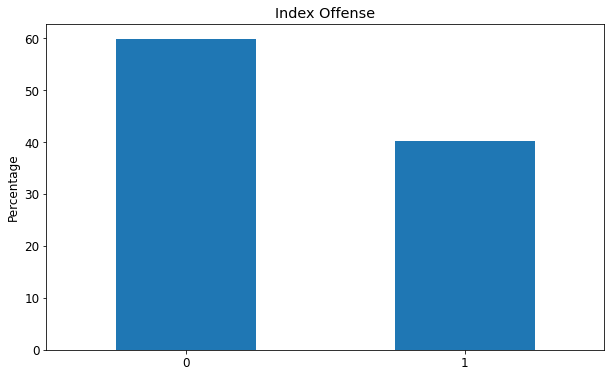

In [41]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'index_offense', bar=True, title='Index Offense')

nonindex_offense,counts,percentage
1,4110592,59.78
0,2765545,40.22


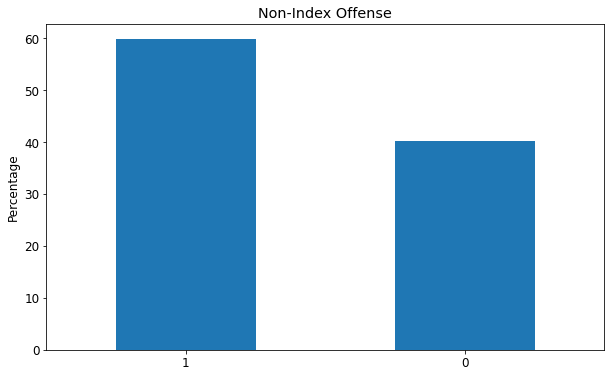

In [42]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'nonindex_offense', bar=True, title='Non-Index Offense')

Note: `description` is a secondary description of the IUCR code, a subcategory of the primary description. `primary_type`, the primary description, will be used instead for exploring data.

In [43]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'description', bar=False)

description,counts,percentage
SIMPLE,810859,11.79
$500 AND UNDER,557704,8.11
DOMESTIC BATTERY SIMPLE,528876,7.69
TO VEHICLE,380963,5.54
TO PROPERTY,361146,5.25
OVER $500,355377,5.17
POSS: CANNABIS 30GMS OR LESS,277353,4.03
FORCIBLE ENTRY,265849,3.87
AUTOMOBILE,250413,3.64
FROM BUILDING,232402,3.38


In [44]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'location_description', bar=False)

location_description,counts,percentage
STREET,1798094,26.15
RESIDENCE,1164770,16.94
APARTMENT,715533,10.41
SIDEWALK,674237,9.81
OTHER,261800,3.81
PARKING LOT/GARAGE(NON.RESID.),197412,2.87
ALLEY,153088,2.23
"SCHOOL, PUBLIC, BUILDING",144339,2.10
RESIDENCE-GARAGE,133048,1.93
SMALL RETAIL STORE,122737,1.78


In [45]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_max = chicago_crime.location_description.value_counts(dropna=False)
df = value_counts_max.rename_axis('location_description').reset_index(name='counts')
df['percentage'] = round(df.counts / sum(df.counts)*100, 2)

# Temporarily set options in the `with` statement
# Note: Settings are restored when you exit the 'with' block
with pd.option_context('max_rows', None, 'max_columns', None):
    print(df)

                                  location_description   counts  percentage
0                                               STREET  1798094       26.15
1                                            RESIDENCE  1164770       16.94
2                                            APARTMENT   715533       10.41
3                                             SIDEWALK   674237        9.81
4                                                OTHER   261800        3.81
5                       PARKING LOT/GARAGE(NON.RESID.)   197412        2.87
6                                                ALLEY   153088        2.23
7                             SCHOOL, PUBLIC, BUILDING   144339         2.1
8                                     RESIDENCE-GARAGE   133048        1.93
9                                   SMALL RETAIL STORE   122737        1.78
10                             RESIDENCE PORCH/HALLWAY   120341        1.75
11                              VEHICLE NON-COMMERCIAL   110651        1.61
12          

#### `location_description` values that were less than 1% of the distribution will be combined into the 'OTHER' group and a new variable will be creatd as `location_description_cat`.

In [46]:
# Return elements, either from `x` or `y`, depending on `condition`
gte_1pct = ['STREET', 'RESIDENCE', 'APARTMENT', 'SIDEWALK', 'OTHER', 'PARKING LOT/GARAGE(NON.RESID.)', 'ALLEY',
            'SCHOOL, PUBLIC, BUILDING', 'RESIDENCE-GARAGE', 'SMALL RETAIL STORE', 'RESIDENCE PORCH/HALLWAY',
            'VEHICLE NON-COMMERCIAL', 'RESTAURANT', 'GROCERY FOOD STORE', 'DEPARTMENT STORE', 'GAS STATION',
            'RESIDENTIAL YARD (FRONT/BACK)']
chicago_crime['location_description_gte_1pct'] = np.where(chicago_crime.location_description.isin(gte_1pct), 1, 0)

In [47]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'location_description_gte_1pct', bar=False)

location_description_gte_1pct,counts,percentage
1,6025583,87.63
0,850554,12.37


In [48]:
# Return elements, either from `x` or `y`, depending on `condition`
chicago_crime['location_description_cat'] = np.where(chicago_crime.location_description_gte_1pct == 0, 'OTHER', chicago_crime.location_description)

# Remove columns by specifying directly column names
# Note: inplace=True changes the original DataFrame
chicago_crime.drop(columns=['location_description_gte_1pct'], inplace=True)

In [49]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'location_description_cat', bar=False)

location_description_cat,counts,percentage
STREET,1798094,26.15
RESIDENCE,1164770,16.94
OTHER,1112354,16.18
APARTMENT,715533,10.41
SIDEWALK,674237,9.81
PARKING LOT/GARAGE(NON.RESID.),197412,2.87
ALLEY,153088,2.23
"SCHOOL, PUBLIC, BUILDING",144339,2.10
RESIDENCE-GARAGE,133048,1.93
SMALL RETAIL STORE,122737,1.78


#### Create indicator (1/0) for whether an arrest was made.

In [50]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'arrest', bar=False)

arrest,counts,percentage
False,4976643,72.38
True,1899494,27.62


In [51]:
# Map values of Series using input correspondence (i.e., map existing input values to new outputs values)
chicago_crime['arrest'] = chicago_crime.arrest.map({False:0, True:1})

arrest,counts,percentage
0,4976643,72.38
1,1899494,27.62


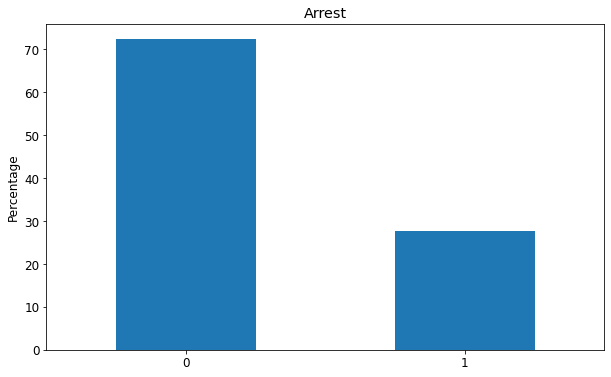

In [52]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'arrest', bar=True, title='Arrest')

#### Create indicator (1/0) for whether the incident was domestic-related.

In [53]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'domestic', bar=False)

domestic,counts,percentage
False,5969459,86.81
True,906678,13.19


In [54]:
# Map values of Series using input correspondence (i.e., map existing input values to new outputs values)
chicago_crime['domestic'] = chicago_crime.domestic.map({False:0, True:1})

domestic,counts,percentage
0,5969459,86.81
1,906678,13.19


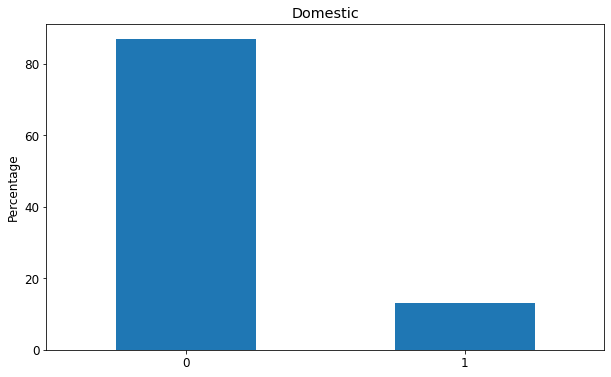

In [55]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'domestic', bar=True, title='Domestic')

In [56]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'beat', bar=False)

beat,counts,percentage
423,53538,0.78
421,52756,0.77
624,47655,0.69
1533,46488,0.68
511,46424,0.68
1112,46175,0.67
823,45835,0.67
1834,45188,0.66
414,43428,0.63
1522,43356,0.63


Note: `beat` 430 and 310 have very low frequencies. After examining [Chicago Data Portal: Current police beat boundaries](https://data.cityofchicago.org/Public-Safety/Boundaries-Police-Beats-current-/aerh-rz74), these don't appear to be active beat numbers.

#### Drop low frequency `beat` observations.

In [57]:
# Return elements, either from `x` or `y`, depending on `condition`
chicago_crime['beat_low_freq'] = np.where(chicago_crime.beat.isin([430, 310]), 1, 0)

In [58]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'beat_low_freq', bar=False)

beat_low_freq,counts,percentage
0,6876113,100.00
1,24,0.00


In [59]:
# Excluding low frequency values
chicago_crime = chicago_crime[chicago_crime.beat_low_freq == 0]

# Remove columns by specifying directly column names
# Note: inplace=True changes the original DataFrame
chicago_crime.drop(columns=['beat_low_freq'], inplace=True)

In [60]:
# Return the number of rows and columns (dimensionality) of the DataFrame
print('Rows: {}, Cols: {}'.format(chicago_crime.shape[0], chicago_crime.shape[1]))

Rows: 6876113, Cols: 23


In [61]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'district', bar=False)

district,counts,percentage
8.000000,466921,6.79
11.000000,441052,6.41
7.000000,405315,5.89
6.000000,396763,5.77
25.000000,396111,5.76
4.000000,389519,5.66
3.000000,349128,5.08
9.000000,340932,4.96
12.000000,336816,4.90
2.000000,325980,4.74


Can the 47 NaN values from `district` be filled in based on `beat` number?

Get length of `beat` column values.

In [62]:
chicago_crime['beat_length'] = chicago_crime.beat.astype(str).apply(len)

In [63]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'beat_length', bar=False)

beat_length,counts,percentage
4,3739548,54.38
3,3136565,45.62


Extract 1st number of `beat` if `beat_length` = 3; Extract 1st and 2nd number of `beat` if `beat_length` = 4.

In [64]:
# Return elements, either from `x` or `y`, depending on `condition`
chicago_crime['district_update'] = np.where(chicago_crime.beat_length == 3, chicago_crime.beat.astype(str).str[:1], chicago_crime.beat.astype(str).str[:2])

# Convert the data type of a column to a specified data type
chicago_crime['district_update'] = chicago_crime.district_update.astype('float')

In [65]:
# Return elements, either from `x` or `y`, depending on `condition`
chicago_crime['district'] = np.where(chicago_crime.district.isnull(), chicago_crime.district_update, chicago_crime.district)

In [66]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'district', bar=False)

district,counts,percentage
8.000000,466923,6.79
11.000000,441056,6.41
7.000000,405319,5.89
6.000000,396764,5.77
25.000000,396117,5.76
4.000000,389520,5.66
3.000000,349131,5.08
9.000000,340933,4.96
12.000000,336816,4.90
2.000000,325981,4.74


Note: `district`s 21 and 13 have very low frequencies. After examining [Chicago Data Portal: Current police district boundaries](https://data.cityofchicago.org/Public-Safety/Boundaries-Police-Districts-current-/fthy-xz3r), these don't appear to be active district numbers.

#### Drop inactive `district` observations

In [67]:
# Return elements, either from `x` or `y`, depending on `condition`
chicago_crime['district_inactive'] = np.where(chicago_crime.district.isin([21, 13]), 1, 0)

In [68]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'district_inactive', bar=False)

district_inactive,counts,percentage
0,6876107,100.00
1,6,0.00


In [69]:
# Excluding low frequency values
chicago_crime = chicago_crime[chicago_crime.district_inactive == 0]

# Remove columns by specifying directly column names
# Note: inplace=True changes the original DataFrame
chicago_crime.drop(columns=['district_inactive'], inplace=True)

In [70]:
# Return the number of rows and columns (dimensionality) of the DataFrame
print('Rows: {}, Cols: {}'.format(chicago_crime.shape[0], chicago_crime.shape[1]))

Rows: 6876107, Cols: 25


Note: `district` 31 has low frequency.  It does appear in the file above. However, it doesn't appear on the [Chicago Police Department: Districts](https://home.chicagopolice.org/community/districts/) webpage and isn't an active district.

In [71]:
chicago_crime[chicago_crime.district == 31.0]

,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,...,year,updated_on,latitude,longitude,lat_long,index_offense,nonindex_offense,location_description_cat,beat_length,district_update
5937,2012-05-21,064XX N MANNHEIM RD,2022,NARCOTICS,POSS: COCAINE,STREET,1,0,1654,31.0,...,2012,2018-02-09 15:44:29+00:00,41.99572241,-87.884462932,"(41.99572241, -87.884462932)",0,1,STREET,4,16.0
8684,2009-01-28,097XX S AVENUE L,2012,NARCOTICS,MANU/DELIVER:COCAINE,VEHICLE NON-COMMERCIAL,1,0,432,31.0,...,2009,2018-02-28 15:56:25+00:00,41.719041877,-87.536494149,"(41.719041877, -87.536494149)",0,1,VEHICLE NON-COMMERCIAL,3,4.0
9834,2009-02-17,099XX S EWING AVE,2012,NARCOTICS,MANU/DELIVER:COCAINE,VEHICLE NON-COMMERCIAL,1,0,432,31.0,...,2009,2016-02-04 06:33:39+00:00,41.71527921,-87.535277004,"(41.71527921, -87.535277004)",0,1,VEHICLE NON-COMMERCIAL,3,4.0
14021,2008-05-13,052XX N HARLEM AVE,2015,NARCOTICS,MANU/DELIVER: HALLUCINOGEN,OTHER,1,0,1613,31.0,...,2008,2018-02-28 15:56:25+00:00,41.975874105,-87.807052779,"(41.975874105, -87.807052779)",0,1,OTHER,4,16.0
26430,2018-03-27,064XX N MANNHEIM RD,0460,BATTERY,SIMPLE,STREET,0,0,1654,31.0,...,2018,2018-05-04 15:51:04+00:00,41.99572241,-87.884462932,"(41.99572241, -87.884462932)",0,1,STREET,4,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6858378,2016-10-08,115XX W TOUHY AVE,0890,THEFT,FROM BUILDING,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,0,0,1654,31.0,...,2016,2018-02-10 15:50:01+00:00,42.008885217,-87.906473187,"(42.008885217, -87.906473187)",1,0,OTHER,4,16.0
6858470,2013-07-05,115XX W TOUHY AVE,0890,THEFT,FROM BUILDING,COMMERCIAL / BUSINESS OFFICE,0,0,1654,31.0,...,2013,2018-02-10 15:50:01+00:00,42.008885217,-87.906473187,"(42.008885217, -87.906473187)",1,0,OTHER,4,16.0
6859274,2011-02-02,005XX W OHARE ST,1310,CRIMINAL DAMAGE,TO PROPERTY,AIRPORT/AIRCRAFT,0,0,1654,31.0,...,2011,2018-02-09 15:44:29+00:00,41.965057367,-87.879953326,"(41.965057367, -87.879953326)",0,1,OTHER,4,16.0
6859597,2010-01-14,005XX W OHARE ST,1320,CRIMINAL DAMAGE,TO VEHICLE,AIRPORT EXTERIOR - NON-SECURE AREA,0,0,1654,31.0,...,2010,2018-02-10 15:50:01+00:00,41.965057367,-87.879953326,"(41.965057367, -87.879953326)",0,1,OTHER,4,16.0


#### Use `beat` to supply the `district` for inactive district 31.

In [72]:
# Return elements, either from `x` or `y`, depending on `condition`
chicago_crime['district'] = np.where(chicago_crime.district == 31.0, chicago_crime.district_update, chicago_crime.district)

# Remove columns by specifying directly column names
# Note: inplace=True changes the original DataFrame
chicago_crime.drop(columns=['beat_length', 'district_update'], inplace=True)

In [73]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'district', bar=False)

district,counts,percentage
8.000000,466929,6.79
11.000000,441061,6.41
7.000000,405321,5.89
6.000000,396764,5.77
25.000000,396125,5.76
4.000000,389535,5.67
3.000000,349143,5.08
9.000000,340934,4.96
12.000000,336816,4.90
2.000000,325981,4.74


In [74]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'ward', bar=False)

ward,counts,percentage
nan,614818,8.94
28.000000,286431,4.17
42.000000,254297,3.70
24.000000,246592,3.59
2.000000,240122,3.49
27.000000,228666,3.33
17.000000,208918,3.04
20.000000,206557,3.00
6.000000,202647,2.95
3.000000,191472,2.78


In [75]:
# Find the unique values in the column and sort
np.sort(chicago_crime.ward.unique())

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., nan])

In [76]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'community_area', bar=False)

community_area,counts,percentage
nan,613491,8.92
25.000000,398032,5.79
8.000000,215160,3.13
43.000000,204476,2.97
23.000000,197935,2.88
28.000000,184857,2.69
24.000000,184852,2.69
67.000000,183831,2.67
29.000000,181238,2.64
71.000000,177379,2.58


In [77]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_max = chicago_crime.community_area.value_counts(dropna=False)
df = value_counts_max.rename_axis('community_area').reset_index(name='counts')
df['percentage'] = round(df.counts / sum(df.counts)*100, 2)

# Temporarily set options in the `with` statement
# Note: Settings are restored when you exit the 'with' block
with pd.option_context('max_rows', None, 'max_columns', None):
    print(df)

    community_area  counts  percentage
0              NaN  613491        8.92
1             25.0  398032        5.79
2              8.0  215160        3.13
3             43.0  204476        2.97
4             23.0  197935        2.88
5             28.0  184857        2.69
6             24.0  184852        2.69
7             67.0  183831        2.67
8             29.0  181238        2.64
9             71.0  177379        2.58
10            49.0  167107        2.43
11            68.0  166923        2.43
12            66.0  154948        2.25
13            69.0  154218        2.24
14            32.0  149768        2.18
15            44.0  134624        1.96
16            22.0  132075        1.92
17            61.0  129356        1.88
18             6.0  124191        1.81
19            27.0  118733        1.73
20            26.0  117078         1.7
21            46.0  116565         1.7
22            19.0  115573        1.68
23            30.0  105554        1.54
24            53.0  10277

In [78]:
# Find the unique values in the column and sort
np.sort(chicago_crime.community_area.unique())

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
       nan])

Note: `community_area` 0 is not a valid community area. However, it doesn't apprear as though this value can be mapped to a valid value after exploring the data.

In [79]:
chicago_crime[['iucr', 'primary_type', 'description', 'location_description', 'arrest', 'domestic',
               'beat', 'district', 'ward', 'community_area', 'fbi_code']][chicago_crime.community_area == 0.0]

,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code
5937,2022,NARCOTICS,POSS: COCAINE,STREET,1,0,1654,16.0,NaN,0.0,18
6974,1152,DECEPTIVE PRACTICE,ILLEGAL USE CASH CARD,BANK,0,0,1614,16.0,41.0,0.0,11
18883,1206,DECEPTIVE PRACTICE,"THEFT BY LESSEE,MOTOR VEH",COMMERCIAL / BUSINESS OFFICE,0,0,1651,16.0,41.0,0.0,11
26430,0460,BATTERY,SIMPLE,STREET,0,0,1654,16.0,NaN,0.0,08B
28093,0460,BATTERY,SIMPLE,CTA PLATFORM,0,0,1614,16.0,41.0,0.0,08B
...,...,...,...,...,...,...,...,...,...,...,...
5269328,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,0,1,811,8.0,23.0,0.0,26
5270044,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,0,0,1614,16.0,41.0,0.0,26
5272386,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,0,0,1651,16.0,41.0,0.0,26
5273110,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,0,0,1651,16.0,41.0,0.0,26


Note: Both `ward` and `community_area` have 8.9% missing values.  It does not appear as though these values can be filled in from other information after exploring the data.  They will not be included in the modeling as these observations would be automatically dropped.

fbi_code,counts,percentage
06,1448226,21.06
08B,1074130,15.62
14,784261,11.41
26,699225,10.17
18,674890,9.82
05,392856,5.71
08A,322820,4.69
07,318906,4.64
03,259579,3.78
11,230890,3.36


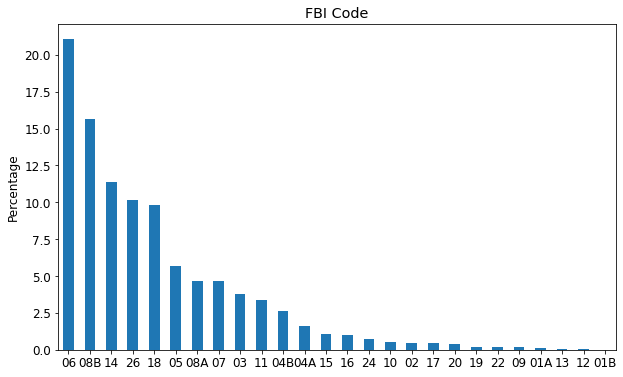

In [80]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'fbi_code', bar=True, title='FBI Code')

In [81]:
# Compute a frequency table of two factors
# Builtin-Styles - https://pandas.pydata.org/pandas-docs/stable/style.html
#orange = sns.light_palette('orange', as_cmap=True)
#pd.crosstab(chicago_crime.iucr.fillna(' NaN'), chicago_crime.fbi_code.fillna(' NaN'), margins=True, margins_name='Total', dropna=False).style.background_gradient(cmap=orange)

Note: `iucr` codes are derived from the crime classification code (`fbi_code`).  Thus, `fbi_code` will not be used in the modeling.

year,counts,percentage
2002,486756,7.08
2001,485750,7.06
2003,475944,6.92
2004,469381,6.83
2005,453716,6.60
2006,448112,6.52
2007,437010,6.36
2008,427055,6.21
2009,392694,5.71
2010,370319,5.39


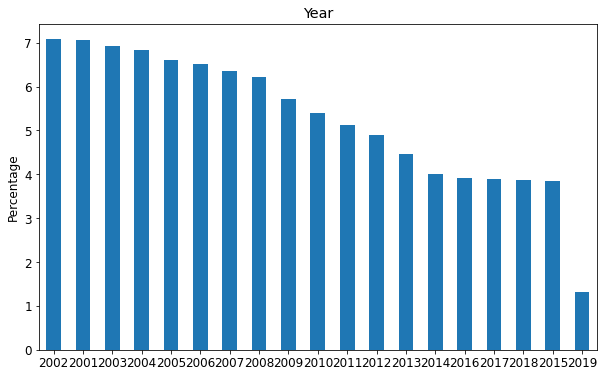

In [82]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'year', bar=True, title='Year')

### Summarize the DataFrame

In [83]:
# Describe numeric columns
# Generates descriptive summary statistics of the central tendency, dispersion, and shape of the distribution
# Note: By default only numeric (int64) fields are returned
#       Excludes "NaN" (missing) values
# Remove columns by specifying directly column names
# Note: inplace=True changes the original DataFrame
round(chicago_crime.drop(columns=['beat', 'district', 'ward', 'community_area']).describe(), 3)

,arrest,domestic,x_coordinate,y_coordinate,year,latitude,longitude,index_offense,nonindex_offense
count,"6,876,107.0","6,876,107.0","6,811,139.0","6,811,139.0","6,876,107.0","6,811,139.0","6,811,139.0","6,876,107.0","6,876,107.0"
mean,0.276,0.132,"1,164,523.23","1,885,726.556","2,008.514",41.842,-87.672,0.402,0.598
std,0.447,0.338,"17,155.392","32,686.631",5.156,0.09,0.062,0.49,0.49
min,0.0,0.0,0.0,0.0,"2,001.0",36.619,-91.687,0.0,0.0
25%,0.0,0.0,"1,152,936.0","1,859,189.0","2,004.0",41.769,-87.714,0.0,0.0
50%,0.0,0.0,"1,166,001.0","1,890,613.0","2,008.0",41.856,-87.666,0.0,1.0
75%,1.0,0.0,"1,176,352.0","1,909,288.0","2,013.0",41.907,-87.628,1.0,1.0
max,1.0,1.0,"1,205,119.0","1,951,622.0","2,019.0",42.023,-87.525,1.0,1.0


Note: Exploring `x_coordinate` values.  The min value of 0.0 is quite far off from the rest of the values and may be an error.

In [84]:
chicago_crime[['x_coordinate', 'y_coordinate', 'latitude', 'longitude']][(chicago_crime.x_coordinate == 0.0)]

,x_coordinate,y_coordinate,latitude,longitude
2798,0.0,0.0,36.619446395,-91.686565684
5492,0.0,0.0,36.619446395,-91.686565684
16979,0.0,0.0,36.619446395,-91.686565684
81795,0.0,0.0,36.619446395,-91.686565684
109867,0.0,0.0,36.619446395,-91.686565684
...,...,...,...,...
6584599,0.0,0.0,36.619446395,-91.686565684
6629085,0.0,0.0,36.619446395,-91.686565684
6663765,0.0,0.0,36.619446395,-91.686565684
6807327,0.0,0.0,36.619446395,-91.686565684


In [85]:
chicago_crime[['x_coordinate', 'y_coordinate', 'latitude', 'longitude']][(chicago_crime.x_coordinate == 0.0)].count()

x_coordinate    161
y_coordinate    161
latitude        161
longitude       161
dtype: int64

In [86]:
# Describe numeric columns
# Generates descriptive summary statistics of the central tendency, dispersion, and shape of the distribution
# Note: By default only numeric (int64) fields are returned
#       Excludes "NaN" (missing) values
# Remove multiple columns
# Note: axis=0 for rows, 1 for columns
round(chicago_crime[['x_coordinate', 'y_coordinate', 'latitude', 'longitude']][chicago_crime.x_coordinate != 0.0].describe(), 3)

,x_coordinate,y_coordinate,latitude,longitude
count,"6,810,978.0","6,810,978.0","6,810,978.0","6,810,978.0"
mean,"1,164,550.757","1,885,771.132",41.842,-87.672
std,"16,194.364","31,374.864",0.086,0.059
min,"1,092,706.0","1,813,894.0",41.645,-87.934
25%,"1,152,937.0","1,859,190.0",41.769,-87.714
50%,"1,166,001.0","1,890,615.0",41.856,-87.666
75%,"1,176,352.0","1,909,288.0",41.907,-87.628
max,"1,205,119.0","1,951,622.0",42.023,-87.525


Note: These values appear to be much more realistic.  The 161 records will be dropped.

In [87]:
# Excluding unrealistic x_coordinate, y_coordinate, latitude, longitude values
chicago_crime = chicago_crime[chicago_crime.x_coordinate != 0.0]

In [88]:
# Return the number of rows and columns (dimensionality) of the DataFrame
print('Rows: {}, Cols: {}'.format(chicago_crime.shape[0], chicago_crime.shape[1]))

Rows: 6875946, Cols: 23


In [89]:
# Describe object columns (e.g. categorical, strings, or timestamps)
# Generates descriptive summary statistics of the count, unique values, top values, and frequency
# Note: "top" is the most common value; "freq" is the most common value's frequency
#       Excludes "NaN" (missing) values
# Remove columns by specifying directly column names
# Note: inplace=True changes the original DataFrame
round(chicago_crime.drop(columns=['location_description', 'updated_on']).describe(include='object'), 3)

,block,iucr,primary_type,description,fbi_code,lat_long,location_description_cat
count,6875946,6875946,6875946,6875946,6875946,6810978,6875946
unique,60198,396,30,374,26,864017,17
top,100XX W OHARE ST,0820,THEFT,SIMPLE,06,"(41.976290414, -87.905227221)",STREET
freq,15362,557704,1448204,810840,1448204,13237,1798028


In [90]:
# Calculate the correlation matrix using the default method (Pearson correlation)
chicago_crime_correlations = chicago_crime[['x_coordinate', 'y_coordinate', 'latitude', 'longitude', 'year']].corr(method='pearson')
round(chicago_crime_correlations, 3)

,x_coordinate,y_coordinate,latitude,longitude,year
x_coordinate,1.0,-0.558,-0.56,1.0,0.002
y_coordinate,-0.558,1.0,1.0,-0.547,-0.003
latitude,-0.56,1.0,1.0,-0.55,-0.003
longitude,1.0,-0.547,-0.55,1.0,0.002
year,0.002,-0.003,-0.003,0.002,1.0


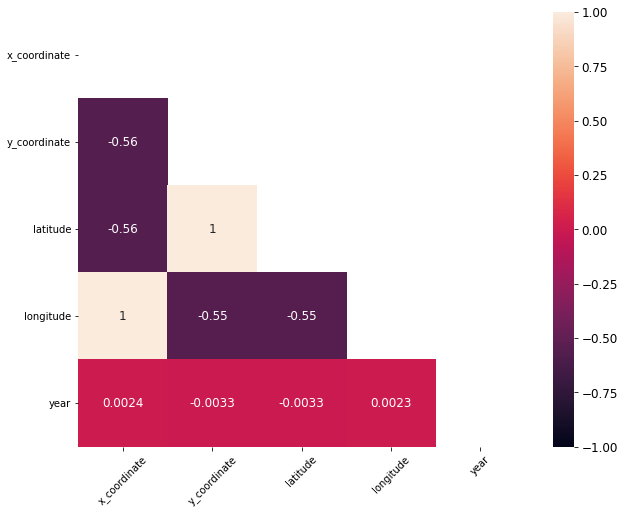

In [91]:
# Create a figure and a set of subplots
# Note: figsize: a tuple (width, height) in inches
fig, ax = plt.subplots(figsize=(10, 8));

# Return an array of zeros with the same shape and type as a given array
mask = np.zeros_like(chicago_crime_correlations, dtype=np.bool)
# Return the indices for the upper-triangle of array
mask[np.triu_indices_from(mask)] = True

# Plot the correlation matrix (color-encoded) using Seaborn's .heatmap() function
# Note: vmin, vmax: values to anchor the colormap, otherwise they are inferred from the data & other keyword arguments
#       annot: write the data value in each cell
ax = sns.heatmap(chicago_crime_correlations, vmin=-1, vmax=1, annot=True, mask=mask, ax=ax);

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10, rotation=45);
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10, va='center', rotation=0);

plt.show();

Note: `latitude` is highly correlated with `y_coordinate`; `longitude` is highly correlated with `x_coordinate`.  `latitude` and `longitude` are measures of location and are basically measuring the same thing as `x_coordinate` and `y_coordinate`.  Thus, `x_coordinate` and `y_coordinate` will not be used.

#### Examine Latitude by Index Offense Groups

In [92]:
# For each group, describe var:
def groupby_describe_func(df, byvar, var, sortvar=''):
    return round(df.groupby(by=byvar)[var].describe().sort_values(by=[sortvar], ascending=False), 3)

In [93]:
# For each group, describe var:
groupby_describe_func(df=chicago_crime, byvar='index_offense', 
                      var='latitude', sortvar='mean')

,count,mean,std,min,25%,50%,75%,max
index_offense,,,,,,,,
1,"2,739,589.0",41.847,0.086,41.645,41.772,41.866,41.912,42.023
0,"4,071,389.0",41.839,0.086,41.645,41.767,41.85,41.903,42.023


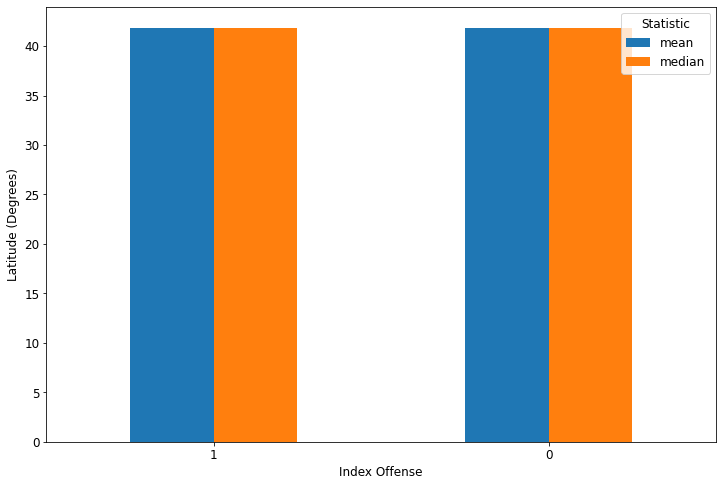

In [94]:
groupby_describe_func(df=chicago_crime, byvar='index_offense', 
                      var='latitude', sortvar='mean')[['mean', '50%']].head(10).plot(kind='bar');
plt.xticks(rotation='horizontal');
plt.xlabel('Index Offense');
plt.ylabel('Latitude (Degrees)');
plt.legend(title='Statistic', labels=('mean', 'median'), loc='upper right');

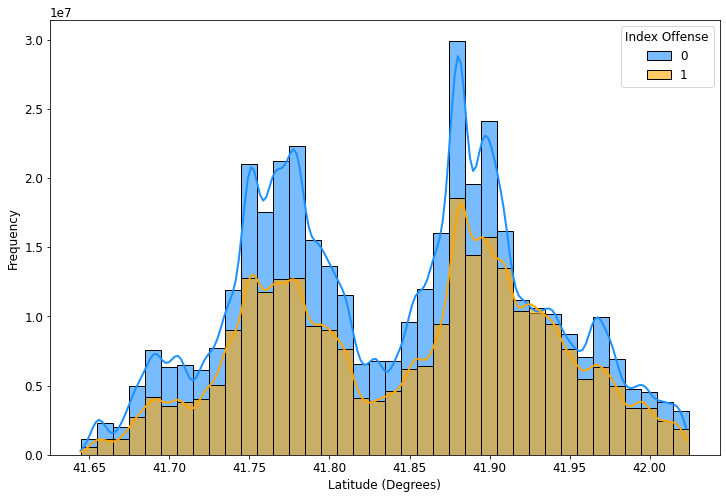

In [95]:
x1 = chicago_crime[(chicago_crime.latitude.notnull())].loc[chicago_crime.index_offense==0, 'latitude']
x2 = chicago_crime[(chicago_crime.latitude.notnull())].loc[chicago_crime.index_offense==1, 'latitude']

# Plot
kwargs = dict(line_kws={'linewidth': 2})

sns.histplot(x1,
             stat='frequency', # 'frequency' equivalent to 'count' when binwidth=1
             binwidth=0.01,
             #discrete=True,
             kde=True,
             color='dodgerblue',
             alpha=.6,
             label='0',
             **kwargs)
sns.histplot(x2,
             stat='frequency', # 'frequency' equivalent to 'count' when binwidth=1
             binwidth=0.01,
             #discrete=True,
             kde=True,
             color='orange',
             alpha=.6,
             label='1',
             **kwargs)
#plt.xlim(left, right)
plt.xlabel('Latitude (Degrees)')
plt.ylabel('Frequency')
plt.legend(title='Index Offense', loc='upper right');

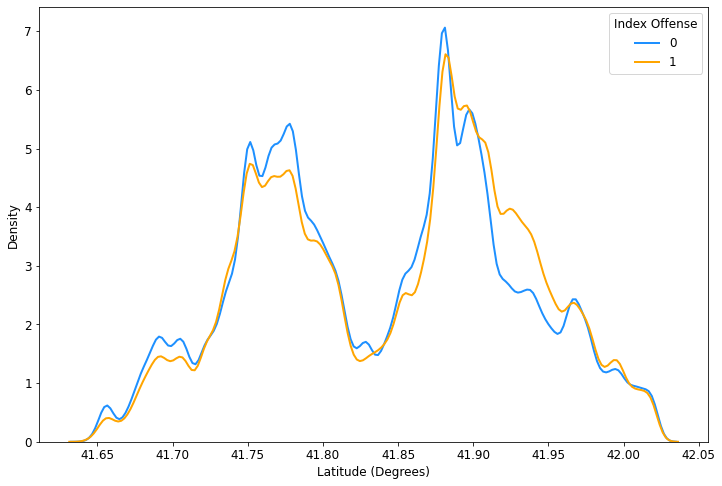

In [96]:
x1 = chicago_crime[(chicago_crime.latitude.notnull())].loc[chicago_crime.index_offense==0, 'latitude']
x2 = chicago_crime[(chicago_crime.latitude.notnull())].loc[chicago_crime.index_offense==1, 'latitude']

# Plot
sns.kdeplot(x1,
            color='dodgerblue',
            linewidth=2,
            label='0')
sns.kdeplot(x2,
            color='orange',
            linewidth=2,
            label='1')
#plt.xlim(left, right)
plt.xlabel('Latitude (Degrees)')
plt.ylabel('Density')
plt.legend(title='Index Offense', loc='upper right');

[Normality Tests](https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/)
- QQ Plot
- Shapiro-Wilk test

index_offense   
0              0    Figure(864x576)
1              0    Figure(864x576)
Name: latitude, dtype: object

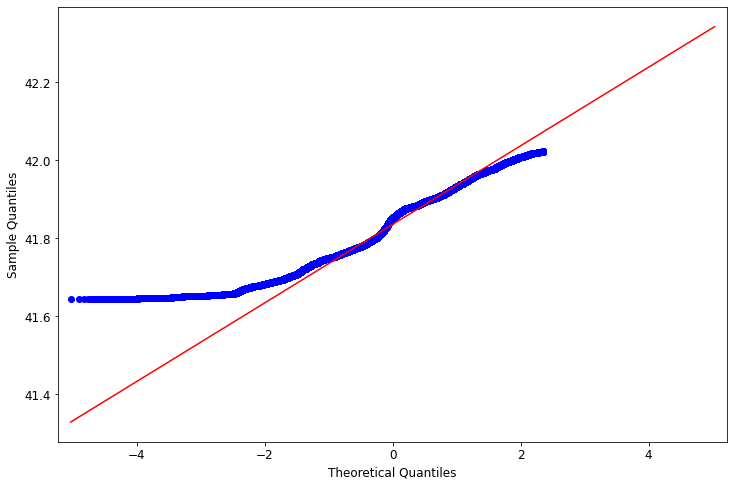

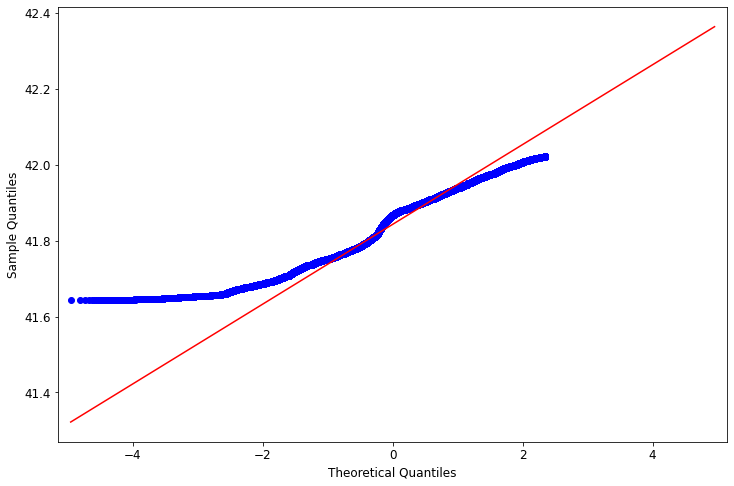

In [97]:
# Q-Q plot of the quantiles of x versus the quantiles/ppf of a distribution
# Note: dist: comparison distribution; the default is scipy.stats.distributions.norm (a standard normal)
#       line: options for the reference line to which the data is compared;
#             "45" - 45-degree line
#             "s" - standardized line, the expected order statistics are scaled by the standard deviation of the given sample and have the mean added to them
#             "r" - A regression line is fit
#             "q" - A line is fit through the quartile
chicago_crime.groupby(by='index_offense').latitude.apply(lambda x: pd.Series(sm.qqplot(x, line='q')))
#plt.show()

In [98]:
# Perform the Shapiro-Wilk test for normality
# The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution
# Note: p-value may not be accurate for N > 5000
sw_df = round(chicago_crime.groupby(by='index_offense').latitude \
        .apply(lambda x: pd.Series(stats.shapiro(x.dropna()), index=['W-statistic', 'p-value'])), 3)
print('Shapiro-Wilk test:')
print('H0: the sample has a Normal distribution \nHa: the sample does not have a Normal distribution\n')
print(sw_df)

/Users/yangweichle/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk test:
H0: the sample has a Normal distribution 
Ha: the sample does not have a Normal distribution

index_offense             
0              W-statistic   0.002
               p-value         0.0
1              W-statistic   0.072
               p-value         0.0
Name: latitude, dtype: float64


[Mann-Whitney U test](https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/)

In [99]:
# Compute the Mann-Whitney rank test on samples x and y
# Use only when the number of observation in each sample is > 20 and you have 2 independent samples of ranks
# This test corrects for ties and by default uses a continuity correction
# Note: alternative: defines the alternative hypothesis;
#                    'two-sided', 'less': one-sided, 'greater': one-sided
statistic, pvalue = stats.mannwhitneyu(*chicago_crime.groupby(by='index_offense').latitude.apply(lambda x: list(x)),
                                       alternative='two-sided')
print('Mann-Whitney U test:')
print('U-statistic =', round(statistic, 3))
print('p-value     =', round(pvalue, 3))

Mann-Whitney U test:
U-statistic = 5371845802360.0
p-value     = 0.0


[Independent Two-Sample T-test](https://pythonfordatascience.org/independent-t-test-python/)

In [100]:
# Calculate the T-test for the means of *two independent* samples of scores
# Note: equal_var: if True (default), perform a standard independent 2 sample test that assumes equal population variances;
#                  if False, perform Welch's t-test, which does not assume equal population variance
#       nan_policy: defines how to handle when input contains nan. 'propagate' returns nan, 'raise' throws an error,
#                   'omit' performs the calculations ignoring nan values; default is 'propagate'
statistic, pvalue = stats.ttest_ind(*chicago_crime.groupby(by='index_offense').latitude.apply(lambda x: list(x)),
                                    equal_var=True, nan_policy='omit')
print('Independent Two-Sample t-test:')
print('t-statistic =', round(statistic, 3))
print('p-value     =', round(pvalue, 3))

Independent Two-Sample t-test:
t-statistic = -116.274
p-value     = 0.0


In [101]:
a = chicago_crime.groupby(by='index_offense').latitude.apply(lambda x: list(x))
a0 = pd.Series(a[0])
a1 = pd.Series(a[1])
descriptives, results = rp.ttest(a0, a1, 'Non-Index', 'Index')
round(descriptives, 3)

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Non-Index,"4,071,389.0",41.839,0.086,0.0,41.839,41.839
1,Index,"2,739,589.0",41.847,0.086,0.0,41.847,41.847
2,combined,"6,810,978.0",41.842,0.086,0.0,41.842,41.842


In [102]:
round(results, 3)

,Independent t-test,results
0,Difference (Non-Index - Index) =,-0.008
1,Degrees of freedom =,"6,810,976.0"
2,t =,-116.274
3,Two side test p value =,0.0
4,Difference < 0 p value =,0.0
5,Difference > 0 p value =,1.0
6,Cohen's d =,-0.091
7,Hedge's g =,-0.091
8,Glass's delta =,-0.091
9,r =,0.044


#### Examine Longitude by Index Offense Groups

In [103]:
# For each group, describe var:
groupby_describe_func(df=chicago_crime, byvar='index_offense', 
                      var='longitude', sortvar='mean')

,count,mean,std,min,25%,50%,75%,max
index_offense,,,,,,,,
1,"2,739,589.0",-87.67,0.057,-87.934,-87.709,-87.664,-87.628,-87.525
0,"4,071,389.0",-87.673,0.06,-87.934,-87.717,-87.668,-87.629,-87.525


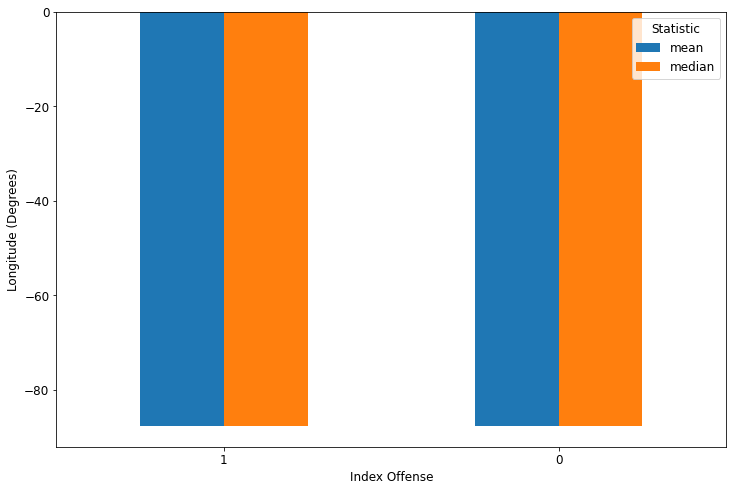

In [104]:
groupby_describe_func(df=chicago_crime, byvar='index_offense', 
                      var='longitude', sortvar='mean')[['mean', '50%']].head(10).plot(kind='bar');
plt.xticks(rotation='horizontal');
plt.xlabel('Index Offense');
plt.ylabel('Longitude (Degrees)');
plt.legend(title='Statistic', labels=('mean', 'median'), loc='upper right');

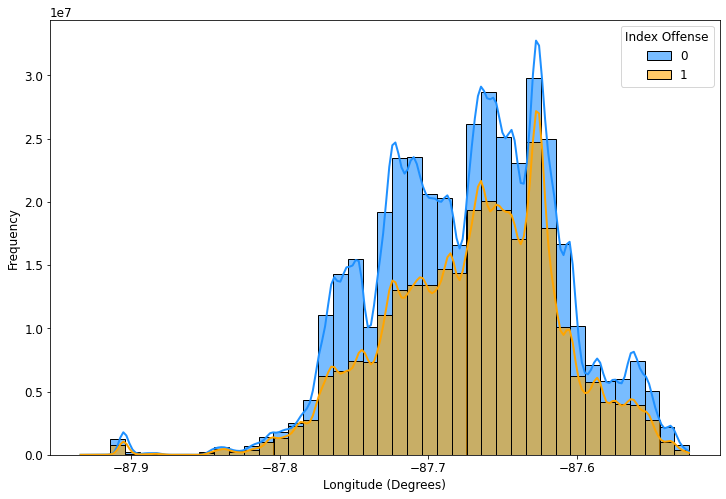

In [105]:
x1 = chicago_crime[(chicago_crime.longitude.notnull())].loc[chicago_crime.index_offense==0, 'longitude']
x2 = chicago_crime[(chicago_crime.longitude.notnull())].loc[chicago_crime.index_offense==1, 'longitude']

# Plot
kwargs = dict(line_kws={'linewidth': 2})

sns.histplot(x1,
             stat='frequency', # 'frequency' equivalent to 'count' when binwidth=1
             binwidth=0.01,
             #discrete=True,
             kde=True,
             color='dodgerblue',
             alpha=.6,
             label='0',
             **kwargs)
sns.histplot(x2,
             stat='frequency', # 'frequency' equivalent to 'count' when binwidth=1
             binwidth=0.01,
             #discrete=True,
             kde=True,
             color='orange',
             alpha=.6,
             label='1',
             **kwargs)
#plt.xlim(left, right)
plt.xlabel('Longitude (Degrees)')
plt.ylabel('Frequency')
plt.legend(title='Index Offense', loc='upper right');

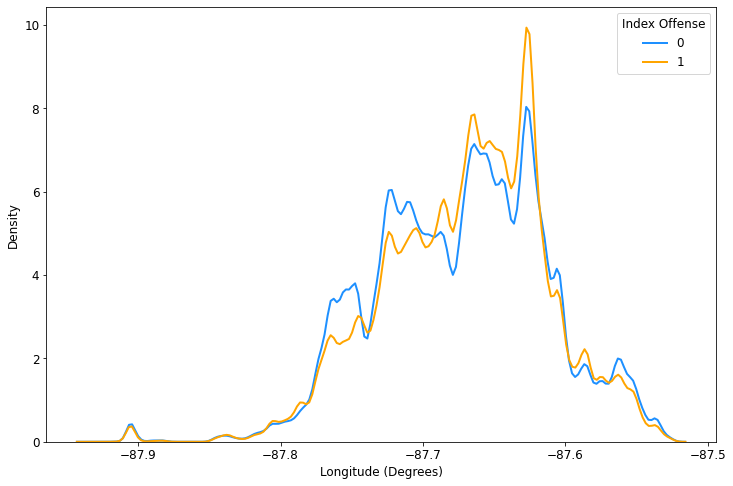

In [106]:
x1 = chicago_crime[(chicago_crime.longitude.notnull())].loc[chicago_crime.index_offense==0, 'longitude']
x2 = chicago_crime[(chicago_crime.longitude.notnull())].loc[chicago_crime.index_offense==1, 'longitude']

# Plot
sns.kdeplot(x1,
            color='dodgerblue',
            linewidth=2,
            label='0')
sns.kdeplot(x2,
            color='orange',
            linewidth=2,
            label='1')
#plt.xlim(left, right)
plt.xlabel('Longitude (Degrees)')
plt.ylabel('Density')
plt.legend(title='Index Offense', loc='upper right');

[Normality Tests](https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/)
- QQ Plot
- Shapiro-Wilk test

index_offense   
0              0    Figure(864x576)
1              0    Figure(864x576)
Name: longitude, dtype: object

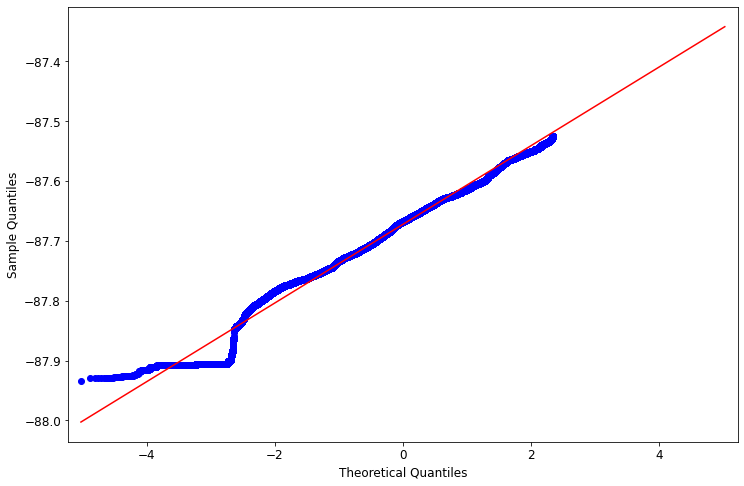

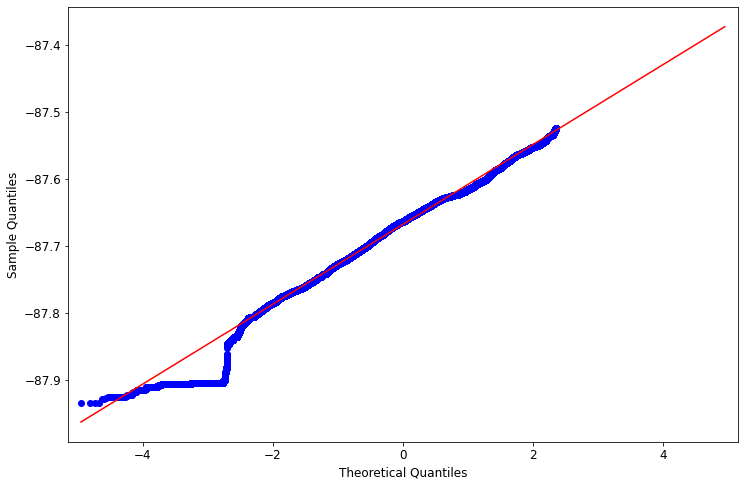

In [107]:
# Q-Q plot of the quantiles of x versus the quantiles/ppf of a distribution
# Note: dist: comparison distribution; the default is scipy.stats.distributions.norm (a standard normal)
#       line: options for the reference line to which the data is compared;
#             "45" - 45-degree line
#             "s" - standardized line, the expected order statistics are scaled by the standard deviation of the given sample and have the mean added to them
#             "r" - A regression line is fit
#             "q" - A line is fit through the quartile
chicago_crime.groupby(by='index_offense').longitude.apply(lambda x: pd.Series(sm.qqplot(x, line='q')))
#plt.show()

In [108]:
# Perform the Shapiro-Wilk test for normality
# The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution
# Note: p-value may not be accurate for N > 5000
sw_df = round(chicago_crime.groupby(by='index_offense').longitude \
        .apply(lambda x: pd.Series(stats.shapiro(x.dropna()), index=['W-statistic', 'p-value'])), 3)
print('Shapiro-Wilk test:')
print('H0: the sample has a Normal distribution \nHa: the sample does not have a Normal distribution\n')
print(sw_df)

/Users/yangweichle/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk test:
H0: the sample has a Normal distribution 
Ha: the sample does not have a Normal distribution

index_offense             
0              W-statistic   0.001
               p-value         0.0
1              W-statistic   0.014
               p-value         0.0
Name: longitude, dtype: float64


[Mann-Whitney U test](https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/)

In [109]:
# Compute the Mann-Whitney rank test on samples x and y
# Use only when the number of observation in each sample is > 20 and you have 2 independent samples of ranks
# This test corrects for ties and by default uses a continuity correction
# Note: alternative: defines the alternative hypothesis;
#                    'two-sided', 'less': one-sided, 'greater': one-sided
statistic, pvalue = stats.mannwhitneyu(*chicago_crime.groupby(by='index_offense').longitude.apply(lambda x: list(x)),
                                       alternative='two-sided')
print('Mann-Whitney U test:')
print('U-statistic =', round(statistic, 3))
print('p-value     =', round(pvalue, 3))

Mann-Whitney U test:
U-statistic = 5471809090929.0
p-value     = 0.0


[Independent Two-Sample T-test](https://pythonfordatascience.org/independent-t-test-python/)

In [110]:
# Calculate the T-test for the means of *two independent* samples of scores
# Note: equal_var: if True (default), perform a standard independent 2 sample test that assumes equal population variances;
#                  if False, perform Welch's t-test, which does not assume equal population variance
#       nan_policy: defines how to handle when input contains nan. 'propagate' returns nan, 'raise' throws an error,
#                   'omit' performs the calculations ignoring nan values; default is 'propagate'
statistic, pvalue = stats.ttest_ind(*chicago_crime.groupby(by='index_offense').longitude.apply(lambda x: list(x)),
                                    equal_var=True, nan_policy='omit')
print('Independent Two-Sample t-test:')
print('t-statistic =', round(statistic, 3))
print('p-value     =', round(pvalue, 3))

Independent Two-Sample t-test:
t-statistic = -76.291
p-value     = 0.0


In [111]:
a = chicago_crime.groupby(by='index_offense').longitude.apply(lambda x: list(x))
a0 = pd.Series(a[0])
a1 = pd.Series(a[1])
descriptives, results = rp.ttest(a0, a1, 'Non-Index', 'Index')
round(descriptives, 3)

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Non-Index,"4,071,389.0",-87.673,0.06,0.0,-87.673,-87.673
1,Index,"2,739,589.0",-87.67,0.057,0.0,-87.67,-87.67
2,combined,"6,810,978.0",-87.672,0.059,0.0,-87.672,-87.672


In [112]:
round(results, 3)

,Independent t-test,results
0,Difference (Non-Index - Index) =,-0.004
1,Degrees of freedom =,"6,810,976.0"
2,t =,-76.292
3,Two side test p value =,0.0
4,Difference < 0 p value =,0.0
5,Difference > 0 p value =,1.0
6,Cohen's d =,-0.06
7,Hedge's g =,-0.06
8,Glass's delta =,-0.058
9,r =,0.029


### Data Modeling

#### Predicting Index Offense

In [113]:
print('Percentage of Index Offense=No(0), Index Offense=Yes(1)')
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'index_offense', bar=False)

Percentage of Index Offense=No(0), Index Offense=Yes(1)


index_offense,counts,percentage
0,4110507,59.78
1,2765439,40.22


### Note: CLASSES ARE NOT IMBALANCED!!

### Using Logistic Regression for Classification

Logistic regression: Log odds of a categorical response being "true" (1) is modeled as a linear combination of the features.

$$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$

This is called the logit function.

The equation can be rearranged into the logistic function.

$$\hat{p} = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$$

#### Build and train logistic regression models

Create dummy variables for `location_description_cat`, `district`, and `year`.

In [114]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'location_description_cat', bar=False)

location_description_cat,counts,percentage
STREET,1798028,26.15
RESIDENCE,1164770,16.94
OTHER,1112276,16.18
APARTMENT,715525,10.41
SIDEWALK,674226,9.81
PARKING LOT/GARAGE(NON.RESID.),197408,2.87
ALLEY,153088,2.23
"SCHOOL, PUBLIC, BUILDING",144323,2.10
RESIDENCE-GARAGE,133047,1.93
SMALL RETAIL STORE,122737,1.79


In [115]:
# Convert categorical variable into dummy/indicator variables
# Note: prefix: string to append DataFrame column names
#       drop_first=True removes the first level to get k-1 dummies out of k categorical events
# Join columns with other DataFrame either on index or on a key
#chicago_crime.join(pd.get_dummies(chicago_crime.location_description_cat, prefix='location', drop_first=False)).columns
chicago_crime = chicago_crime.join(pd.get_dummies(chicago_crime.location_description_cat, prefix='location', drop_first=False))

# Remove columns by specifying directly column names
# Note: inplace=True changes the original DataFrame
chicago_crime.drop(columns=['location_STREET'], inplace=True)
chicago_crime.head()

,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,...,location_PARKING LOT/GARAGE(NON.RESID.),location_RESIDENCE,location_RESIDENCE PORCH/HALLWAY,location_RESIDENCE-GARAGE,location_RESIDENTIAL YARD (FRONT/BACK),location_RESTAURANT,"location_SCHOOL, PUBLIC, BUILDING",location_SIDEWALK,location_SMALL RETAIL STORE,location_VEHICLE NON-COMMERCIAL
0,2019-05-15,095XX S AVALON AVE,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,RESIDENCE,0,1,511,5.0,...,0,1,0,0,0,0,0,0,0,0
1,2019-05-06,052XX S WELLS ST,4651,OTHER OFFENSE,SEX OFFENDER: FAIL REG NEW ADD,RESIDENCE,0,0,935,9.0,...,0,1,0,0,0,0,0,0,0,0
2,2019-05-02,033XX W FOSTER AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,SIDEWALK,1,0,1712,17.0,...,0,0,0,0,0,0,0,1,0,0
3,2019-03-29,087XX S STONY ISLAND AVE,0497,BATTERY,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,PARKING LOT/GARAGE(NON.RESID.),0,1,412,4.0,...,1,0,0,0,0,0,0,0,0,0
4,2019-03-22,101XX S AVENUE L,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,0,0,432,4.0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'district', bar=False)

district,counts,percentage
8.000000,466902,6.79
11.000000,441055,6.41
7.000000,405313,5.89
6.000000,396756,5.77
25.000000,396116,5.76
4.000000,389527,5.67
3.000000,349137,5.08
9.000000,340929,4.96
12.000000,336801,4.90
2.000000,325978,4.74


In [117]:
# Convert categorical variable into dummy/indicator variables
# Note: prefix: string to append DataFrame column names
#       drop_first=True removes the first level to get k-1 dummies out of k categorical events
# Join columns with other DataFrame either on index or on a key
#chicago_crime.join(pd.get_dummies(chicago_crime.district, prefix='district', drop_first=False)).columns
chicago_crime = chicago_crime.join(pd.get_dummies(chicago_crime.district, prefix='district', drop_first=False))

# Remove columns by specifying directly column names
# Note: inplace=True changes the original DataFrame
chicago_crime.drop(columns=['district_8.0'], inplace=True)
chicago_crime.head()

,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,...,district_14.0,district_15.0,district_16.0,district_17.0,district_18.0,district_19.0,district_20.0,district_22.0,district_24.0,district_25.0
0,2019-05-15,095XX S AVALON AVE,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,RESIDENCE,0,1,511,5.0,...,0,0,0,0,0,0,0,0,0,0
1,2019-05-06,052XX S WELLS ST,4651,OTHER OFFENSE,SEX OFFENDER: FAIL REG NEW ADD,RESIDENCE,0,0,935,9.0,...,0,0,0,0,0,0,0,0,0,0
2,2019-05-02,033XX W FOSTER AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,SIDEWALK,1,0,1712,17.0,...,0,0,0,1,0,0,0,0,0,0
3,2019-03-29,087XX S STONY ISLAND AVE,0497,BATTERY,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,PARKING LOT/GARAGE(NON.RESID.),0,1,412,4.0,...,0,0,0,0,0,0,0,0,0,0
4,2019-03-22,101XX S AVENUE L,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,0,0,432,4.0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'year', bar=False)

year,counts,percentage
2002,486744,7.08
2001,485732,7.06
2003,475933,6.92
2004,469370,6.83
2005,453716,6.60
2006,448111,6.52
2007,437010,6.36
2008,427036,6.21
2009,392682,5.71
2010,370299,5.39


In [119]:
# Convert categorical variable into dummy/indicator variables
# Note: prefix: string to append DataFrame column names
#       drop_first=True removes the first level to get k-1 dummies out of k categorical events
# Join columns with other DataFrame either on index or on a key
chicago_crime = chicago_crime.join(pd.get_dummies(chicago_crime.year, prefix='year', drop_first=True))
chicago_crime.head()

,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,...,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019
0,2019-05-15,095XX S AVALON AVE,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,RESIDENCE,0,1,511,5.0,...,0,0,0,0,0,0,0,0,0,1
1,2019-05-06,052XX S WELLS ST,4651,OTHER OFFENSE,SEX OFFENDER: FAIL REG NEW ADD,RESIDENCE,0,0,935,9.0,...,0,0,0,0,0,0,0,0,0,1
2,2019-05-02,033XX W FOSTER AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,SIDEWALK,1,0,1712,17.0,...,0,0,0,0,0,0,0,0,0,1
3,2019-03-29,087XX S STONY ISLAND AVE,0497,BATTERY,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,PARKING LOT/GARAGE(NON.RESID.),0,1,412,4.0,...,0,0,0,0,0,0,0,0,0,1
4,2019-03-22,101XX S AVENUE L,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,0,0,432,4.0,...,0,0,0,0,0,0,0,0,0,1


In [120]:
chicago_crime.columns

Index(['date', 'block', 'iucr', 'primary_type', 'description',
       'location_description', 'arrest', 'domestic', 'beat', 'district',
       'ward', 'community_area', 'fbi_code', 'x_coordinate', 'y_coordinate',
       'year', 'updated_on', 'latitude', 'longitude', 'lat_long',
       'index_offense', 'nonindex_offense', 'location_description_cat',
       'location_ALLEY', 'location_APARTMENT', 'location_DEPARTMENT STORE',
       'location_GAS STATION', 'location_GROCERY FOOD STORE', 'location_OTHER',
       'location_PARKING LOT/GARAGE(NON.RESID.)', 'location_RESIDENCE',
       'location_RESIDENCE PORCH/HALLWAY', 'location_RESIDENCE-GARAGE',
       'location_RESIDENTIAL YARD (FRONT/BACK)', 'location_RESTAURANT',
       'location_SCHOOL, PUBLIC, BUILDING', 'location_SIDEWALK',
       'location_SMALL RETAIL STORE', 'location_VEHICLE NON-COMMERCIAL',
       'district_1.0', 'district_2.0', 'district_3.0', 'district_4.0',
       'district_5.0', 'district_6.0', 'district_7.0', 'district_9.0

### Building Phase

In [121]:
# Create a list of features
feature_cols = ['arrest', 'domestic',
                'location_ALLEY', 'location_APARTMENT', 'location_DEPARTMENT STORE', 'location_GAS STATION',
                'location_GROCERY FOOD STORE', 'location_OTHER', 'location_PARKING LOT/GARAGE(NON.RESID.)', 'location_RESIDENCE',
                'location_RESIDENCE PORCH/HALLWAY', 'location_RESIDENCE-GARAGE', 'location_RESIDENTIAL YARD (FRONT/BACK)',
                'location_RESTAURANT', 'location_SCHOOL, PUBLIC, BUILDING', 'location_SIDEWALK', 'location_SMALL RETAIL STORE',
                'location_VEHICLE NON-COMMERCIAL',
                'district_1.0', 'district_2.0', 'district_3.0', 'district_4.0', 'district_5.0', 'district_6.0',
                'district_7.0', 'district_9.0', 'district_10.0', 'district_11.0', 'district_12.0', 'district_14.0',
                'district_15.0', 'district_16.0', 'district_17.0', 'district_18.0','district_19.0', 'district_20.0',
                'district_22.0', 'district_24.0', 'district_25.0',
                'year_2002', 'year_2003', 'year_2004', 'year_2005', 'year_2006', 'year_2007', 'year_2008', 'year_2009',
                'year_2010', 'year_2011', 'year_2012', 'year_2013', 'year_2014', 'year_2015', 'year_2016', 'year_2017',
                'year_2018', 'year_2019']

In [122]:
# Create X and y
X = chicago_crime[feature_cols]
y = chicago_crime.index_offense

In [123]:
# Split X and y into random training and testing subsets
# --> Generate stratified train and test sets for classification
# Note: train_size: between 0.0 and 1.0 and represent the proportion of the dataset to include in the train split
#       test_size: between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split
#       random_state: the seed used by the random number generator
#       stratify: if not None, data is split in a stratified fashion, using this as the class labels
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, test_size=0.30, random_state=65, stratify=y)

print('Length of X_train: {}'.format(len(X_train)))
print('Length of y_train: {}'.format(len(y_train)))
print('Length of X_test: {}'.format(len(X_test)))
print('Length of y_test: {}'.format(len(y_test)))

Length of X_train: 4813162
Length of y_train: 4813162
Length of X_test: 2062784
Length of y_test: 2062784


#### Compute Baseline Accuracy
[How to Get Baseline Results and Why They Matter](https://machinelearningmastery.com/how-to-get-baseline-results-and-why-they-matter/)

In [124]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
print(y_train.value_counts())
print()

most_freq_class = y_train.value_counts().index[0]
print('Most frequent class in training dataset:', most_freq_class)
print()

print('Baseline accuracy in test dataset:', round(y_test.value_counts()[most_freq_class] / y_test.count(), 3))
class_0_prob = y_test.value_counts()[0] / y_test.count()
class_1_prob = y_test.value_counts()[1] / y_test.count()

# Instantiate a classifier that makes predictions using simple rules and fit dummy classifier
# Note: stragegy: strategy to use to generate predictions
#       random_state: the seed used by the random number generator
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=0)
dummy_clf.fit(X_train, y_train)
print('Baseline accuracy in test dataset:', round(dummy_clf.score(X_test, y_test), 3))

0    2877355
1    1935807
Name: index_offense, dtype: int64

Most frequent class in training dataset: 0

Baseline accuracy in test dataset: 0.598
Baseline accuracy in test dataset: 0.598


In [125]:
# Instantiate a Logistic Regression classifier and fit logistic model
# Note: random_state: the seed used by the random number generator
logreg_clf = LogisticRegression(random_state=46)
logreg_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=46, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [126]:
# Predict the class labels using the logistic model
y_pred_class_logreg_clf = logreg_clf.predict(X_test)

In [127]:
# Calculate predicted probability estimates of each class
# Each row sums to one and contains the probabilities of the point being a 0-Non-Index Offense, 1-Index Offense
logreg_clf.predict_proba(X_test)[0:10]

array([[0.35571433, 0.64428567],
       [0.4312163 , 0.5687837 ],
       [0.55741446, 0.44258554],
       [0.37056635, 0.62943365],
       [0.89302648, 0.10697352],
       [0.36187791, 0.63812209],
       [0.87192425, 0.12807575],
       [0.87442256, 0.12557744],
       [0.38472837, 0.61527163],
       [0.81540745, 0.18459255]])

In [128]:
# Calculate predicted probability estimates of each class
y_pred_prob_logreg_clf = logreg_clf.predict_proba(X_test)[:, 1]

#### Get the coefficient for each feature

In [129]:
name = X.columns
coef = np.round(logreg_clf.coef_[0], 4)
pd.DataFrame([name, coef], index=['Name', 'Coefficient']).transpose()

,Name,Coefficient
0,arrest,-1.8265
1,domestic,-1.706
2,location_ALLEY,-0.1718
3,location_APARTMENT,-0.3369
4,location_DEPARTMENT STORE,2.5727
5,location_GAS STATION,0.0169
6,location_GROCERY FOOD STORE,1.809
7,location_OTHER,-0.2782
8,location_PARKING LOT/GARAGE(NON.RESID.),0.3046
9,location_RESIDENCE,-0.662


### Operational Phase

[Classification Accuracy is Not Enough: More Performance Measures You Can Use](https://machinelearningmastery.com/classification-accuracy-is-not-enough-more-performance-measures-you-can-use/)

### $\text{Precision = Positive Predictive Value (PPV)} = {TP \over (TP \ + \ FP)} = {TP \over (Total \ Predicted \ Positive)} --> \text{completeness}$
- "How many of the items selected are relevant"
- Of the items placed into a class, how many of them are True Positives.
- The ability of the classifier to not label a sample as positive if it is negative.

### $\text{Recall = True Positive Rate (Sensitivity)} = {TP \over (TP \ + \ FN)} = {TP \over (Total \ Actual \ Positive)} --> \text{exactness}$
- "How many of the relevant items are selected"
- Of the items that were suppose to be placed into a class, how many did we accurately place.
- The ability of the classifier to find all the positive samples.

### $F_{1}Score = 2*\frac{\text{Precision * Recall}}{\text{Precision + Recall}}$
- 0 <= F1 <= 1, where 0 is awful and 1 is perfection.
- F1 is considered a harmonic mean as it averages Precision and Recall.
- With classification models you often times have to choose what kind of error you are willing to increase in order to reduce the other and thus you may want to optimize Precision or Recall accordingly.
- If you are uncertain which you should optimize, F1 score may be the metric of choice.

In [130]:
# Function to make predictions 
def prediction(X_test, clf_object, model_type_text): 
  
    # Predict the class labels using the classifier model
    y_pred_class = clf_object.predict(X_test)
    
    # Calculate predicted probability estimates of each class
    y_pred_prob = clf_object.predict_proba(X_test)[:, 1]

    print('Results Using {}:'.format(model_type_text))
    print('Predicted values:')
    print(y_pred_class)
    print('')
    return y_pred_class, y_pred_prob

In [131]:
# Function to calculate evaluation metrics
def eval_metrics(y_test, y_pred_class, y_pred_prob, clf_object):
      
    # Training accuracy classification score
    training_acc_score = metrics.accuracy_score(y_train, clf_object.predict(X_train))
    print('Training accuracy score:', round(training_acc_score, 4))
    
    # Testing accuracy classification score
    testing_acc_score = metrics.accuracy_score(y_test, y_pred_class)
    print('Testing accuracy score :', round(testing_acc_score, 4))
    
    if testing_acc_score > training_acc_score:
        print('Testing accuracy > Training accuracy')
        print('-> Not overfitting')
    else:
        print('Testing accuracy < Training accuracy')
        print('-> Overfitting!')
    print('')
    
    # Confusion matrix to evaluate the accuracy of a classification
    print('Confusion Matrix:')
    conmat = metrics.confusion_matrix(y_test, y_pred_class)
    
    # Return a flattened array
    tn, fp, fn, tp = conmat.ravel()
    
    print(pd.DataFrame(conmat,
                       index=['True No HR', 'True HR'],
                       columns=['Pred No HR', 'Pred HR']))
    
    print('\nPerformance Measures:')
    cm = [['TN  ',   'FP  ', 'TN + FP'], 
          ['FN  ',   'TP  ', 'FN + TP'],
          ['TN + FN', 'FP + TP', '']]
    print(pd.DataFrame(cm,
                       index=  ['True (0) ', 'True (1) ', 'Total '],
                       columns=['Pred (0)', 'Pred (1)', 'Total']))
    
    print('')
    print('Sensitivity (Recall)                        = TP/(TP + FN) =', round(tp/(tp + fn), 4))
    print('Specificity                                 = TN/(FP + TN) =', round(tn/(fp + tn), 4))
    print('Precision (Positive Predictive Value (PPV)) = TP/(TP + FP) =', round(tp/(tp + fp), 4))
    print('Negative Predictive Value (NPV))            = TN/(FN + TN) =', round(tn/(fn + tn), 4))
    print('F1 Score                                    = 2*(Precision*Recall)/(Precision + Recall) =', round(2*(tp)/(2*(tp) + fp + fn), 4))
    print('\nAccuracy = (TP + TN)/(TP + TN + FP + FN) =', round((tp + tn)/(tp + tn + fp + fn), 4))
    
    # Build a text report showing the main classification metrics
    print('\nClassification Report:')
    print(metrics.classification_report(y_test, y_pred_class))
    print('')
    
    # Area Under the Receiver Operating Characteristic Curve (ROC AUC)
    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
    print('ROC AUC:', round(roc_auc, 3))
    print('')
    
    # Compute Precision-Recall (PR) Curve
    # Note: This implementation is restricted to the binary classification task
    precision, recall, _ = metrics.precision_recall_curve(y_test, y_pred_prob)
    
    # Compute Precision-Recall (PR) Area Under the Curve (AUC) Score
    auc = metrics.auc(x=recall, y=precision)
    print('PR AUC:', round(auc, 3))
    print('The focus on the positive (minority) class makes the Precision-Recall AUC more useful for imbalanced classification')
    print('')
    print('')
    
    print('Evaluation Metrics to Compare Models that Predict Probabilities')
    print('---------------------------------------------------------------')
    print('')
    
    # Log loss, aka logistic loss or cross-entropy loss
    print('Log Loss:')
    # Using baseline probabilities for both classes
    baseline_probs = [[class_0_prob, class_1_prob] for _ in range(len(y_test))]
    avg_logloss_baseline = metrics.log_loss(y_test, baseline_probs)
    print('Baseline = %.3f' % (avg_logloss_baseline))

    # Using model predicted probabilities of the positive class
    avg_logloss_model = metrics.log_loss(y_test, y_pred_prob)
    print('Model    =', round(avg_logloss_model, 3))
    print('')
    
    # Brier Score
    print('Brier Score:')
    print(' -> Focused on the positive class, which for imbalanced classification is the minority class')
    # Using baseline probabilities for the positive class
    baseline_probs_pos_class = [col[1] for col in baseline_probs]
    avg_brier_score_baseline = metrics.brier_score_loss(y_test, baseline_probs_pos_class)
    print('Baseline = %.3f' % (avg_brier_score_baseline))

    # Using model predicted probabilities of the positive class
    avg_brier_score_model = metrics.brier_score_loss(y_test, y_pred_prob)
    print('Model    =', round(avg_brier_score_model, 3))
    
    # Brier Skill Score (BSS)
    # BSS = 1 - (BS_mod / BS_ref)
    bss = 1 - (avg_brier_score_model / avg_brier_score_baseline)
    print('Brier Skill Score =', round(bss, 3))

#### Interpret the Prediction of Probabilities for Binary Classification Models
[ROC Curves and Precision-Recall Curves for Classification](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/)

- **ROC Curves** are appropriate when the *observations are balanced between each class*, whereas **Precision-Recall Curves** are appropriate for *imbalanced datasets*
    - ROC Curves should be used when there are roughly equal numbers of observations for each class
    - Precision-Recall Curves should be used when there is a moderate to large class imbalance


- **ROC Curves** summarize the trade-off between the **True Positive Rate (Sensitivity)** and **False Positive Rate (1-Specificity)** for a predictive model using different probability thresholds
    - True Positive Rate (Sensitivity) summarizes how often a positive class is predicted when the actual outcome is positive
    - False Positive Rate (1-Specificity) is also called the *false alarm rate* as it summarizes how often a positive class is predicted when the actual outcome is negative


- **Precision-Recall Curves** summarize the trade-off between the **True Positive Rate (Recall)** and the **Positive Predictive Value (Precision)** for a predictive model using different probability thresholds
    - Precision (PPV) describes how good a model is at predicting the positive class; intuitively the ability of the classifier not to label as positive a sample that is negative
    - Recall (Sensitivity) summarizes how often a positive class is predicted when the actual outcome is positive; intuitively the ability of the classifier to find all the positive samples
        - Reviewing both Precision and Recall is useful in cases where there is an imbalance in the observations between the two classes
        - Typically the large number of class 0 examples means we are less interested in the skill of the model at predicting class 0 correctly, e.g. high True Negatives
        - Key to the calculation of Precision and Recall is that the calculations do not make use of the True Negatives -- it is only concerned with the correct prediction of the minority class, class 1

In [132]:
def plot_roc_curve(y_test, y_pred_prob):

    # Compute Receiver Operating Characteristic (ROC) Curve
    # Note: This implementation is restricted to the binary classification task
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

    # Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) Score
    # Note: This implementation can be used with binary, multiclass and multilabel classification, 
    #       but some restrictions apply
    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)

    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.plot(fpr, tpr, label='ROC AUC = %0.3f' % roc_auc)
    plt.plot([0, 1], [0, 1], 'r--', label='No Skill')
    plt.legend(loc='lower right')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1-Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.show()

In [133]:
def plot_precision_recall_curve(y_test, y_pred_prob, y_pred_class):
    
    # Compute Precision-Recall (PR) Curve
    # Note: This implementation is restricted to the binary classification task
    precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_prob)

    # Compute Precision-Recall (PR) Area Under the Curve (AUC) Score
    auc = metrics.auc(x=recall, y=precision)

    # Compute the Average Precision (AP) Score
    average_precision = metrics.average_precision_score(y_test, y_pred_prob)
    print('Average Precision (AP) Score: {0:0.3f}'.format(average_precision))

    # Compute the F1 Score, also known as balanced F-score or F-measure
    f1_score = metrics.f1_score(y_test, y_pred_class)
    print('F1 Score: {0:0.3f}'.format(f1_score))

    plt.title('2-class Precision-Recall (PR) Curve')
    plt.plot(recall, precision, label='PR AUC = {0:0.3f}'.format(auc))
    no_skill = len(y_test[y_test==1]) / len(y_test) # ratio of positive cases in the dataset
    plt.plot([0, 1], [no_skill, no_skill], 'r--', label='No Skill')
    plt.legend()
    plt.xlabel('Recall (Sensitivity)')
    plt.ylabel('Precision (PPV)')
    plt.show()    

#### Prediction using Logistic Regression

In [134]:
model_type_text='Logistic Regression Model'
y_pred_class_logreg_clf, y_pred_prob_logreg_clf = prediction(X_test, logreg_clf, model_type_text)
eval_metrics(y_test, y_pred_class_logreg_clf, y_pred_prob_logreg_clf, logreg_clf)

Results Using Logistic Regression Model:
Predicted values:
[1 1 0 ... 1 1 1]

Training accuracy score: 0.6998
Testing accuracy score : 0.6992
Testing accuracy < Training accuracy
-> Overfitting!

Confusion Matrix:
            Pred No HR  Pred HR
True No HR      900023   333129
True HR         287352   542280

Performance Measures:
          Pred (0) Pred (1)    Total
True (0)      TN       FP    TN + FP
True (1)      FN       TP    FN + TP
Total      TN + FN  FP + TP         

Sensitivity (Recall)                        = TP/(TP + FN) = 0.6536
Specificity                                 = TN/(FP + TN) = 0.7299
Precision (Positive Predictive Value (PPV)) = TP/(TP + FP) = 0.6195
Negative Predictive Value (NPV))            = TN/(FN + TN) = 0.758
F1 Score                                    = 2*(Precision*Recall)/(Precision + Recall) = 0.6361

Accuracy = (TP + TN)/(TP + TN + FP + FN) = 0.6992

Classification Report:
              precision    recall  f1-score   support

           0       0

#### Optimize model using grid-search with cross-validation

In [135]:
# Create the parameter grid
parameters = {'penalty': ['l1', 'l2'],
              'C': [0.01, 0.1, 1.0, 10, 100]}

pprint(parameters)

{'C': [0.01, 0.1, 1.0, 10, 100], 'penalty': ['l1', 'l2']}


In [136]:
# Instantiate a Logistic Regression classifier
# Note: random_state: the seed used by the random number generator
#       solver: algorithm to use in the optimization problem
logreg_clf = LogisticRegression(random_state=46, solver='liblinear')

In [137]:
# Instantiate an exhaustive search over specified parameter values for an estimator and run fit with all sets of parameters
# Note: estimator: estimator object
#       param_grid: dictionary with parameters names (string) as keys and lists of parameter settings to try as values; 
#                   this enables searching over any sequence of parameter settings
#       scoring: a single string or a callable to evaluate the predictions on the test set
#       n_jobs: number of jobs to run in parallel; if -1, then the number of jobs is set to the number of cores
#       cv: number of folds in k-fold cross-validation
#       return_train_score: if False, the cv_results_ attribute will not include training scores
logreg_clf_grid = GridSearchCV(estimator=logreg_clf, param_grid=parameters, scoring='roc_auc', 
                               n_jobs=-1, cv=5, return_train_score=True)
search_time_start = time.time()
logreg_clf_grid.fit(X_train, y_train)
print('Grid search time:', int((time.time() - search_time_start)/60), 'mins')

Grid search time: 30 mins


In [138]:
results = pd.DataFrame.from_dict(logreg_clf_grid.cv_results_)
pd.DataFrame.from_dict(logreg_clf_grid.cv_results_, orient='index')

,0,1,2,3,4,5,6,7,8,9
mean_fit_time,422.10398602485657,207.44539942741395,618.0236123561859,371.29728679656984,410.8665800571442,147.6702146053314,343.1225430011749,149.39486989974975,347.89776663780214,149.15457272529602
std_fit_time,18.003947522314363,11.973011766500505,77.17780560770618,106.22988547007795,74.89259952836993,9.35839933675216,36.204172590445346,1.5586486159994166,34.840122031045276,23.787453264455042
mean_score_time,19.99825930595398,15.014872837066651,17.087210416793823,15.327924633026123,10.579644393920898,11.155723285675048,12.29161558151245,12.268789625167846,2.7214479446411133,5.637151098251342
std_score_time,4.778321192275857,2.3577126559455897,7.765594078403279,6.150351287039063,1.0108786414093571,0.9348293059272516,1.507865374691329,2.786172802764381,1.5599725261713415,3.2052547675402225
param_C,0.01,0.01,0.1,0.1,1.0,1.0,10,10,100,100
param_penalty,l1,l2,l1,l2,l1,l2,l1,l2,l1,l2
params,"{'C': 0.01, 'penalty': 'l1'}","{'C': 0.01, 'penalty': 'l2'}","{'C': 0.1, 'penalty': 'l1'}","{'C': 0.1, 'penalty': 'l2'}","{'C': 1.0, 'penalty': 'l1'}","{'C': 1.0, 'penalty': 'l2'}","{'C': 10, 'penalty': 'l1'}","{'C': 10, 'penalty': 'l2'}","{'C': 100, 'penalty': 'l1'}","{'C': 100, 'penalty': 'l2'}"
split0_test_score,0.7615590215364512,0.7615371002125422,0.7615997664309442,0.7615989042515632,0.76160519053449,0.761604681065264,0.7616055838235478,0.7616049345566124,0.7616055822885424,0.7616050124693626
split1_test_score,0.7612067198569815,0.7611975878488852,0.7612584928549284,0.7612573383018811,0.7612639243013661,0.761263811797132,0.7612647935274098,0.7612645485189866,0.7612648418307117,0.7612646138195571
split2_test_score,0.7619091209435338,0.7618894382486483,0.7619560183061216,0.761953672928342,0.7619606209377741,0.7619601234914728,0.7619613657899004,0.7619607388193202,0.7619612425223559,0.7619607344207551


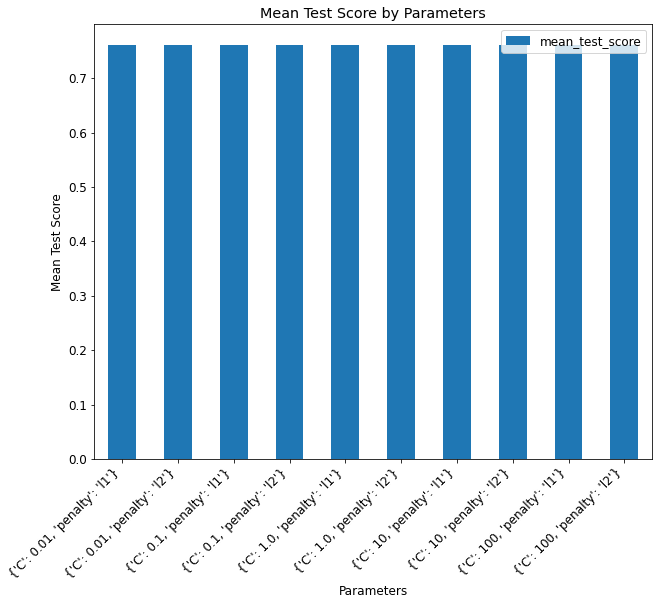

In [139]:
# Create a vertical bar plot by mean test score using matplotlib
# Note: figsize: a tuple (width, height) in inches
ax = results.plot.bar(y='mean_test_score', x='params', figsize=(10, 8));
ax.set_xticklabels(results.params, rotation=45, horizontalalignment='right');
plt.xlabel('Parameters');
plt.ylabel('Mean Test Score');
plt.title('Mean Test Score by Parameters');

In [140]:
print('Best parameter setting found by grid search:')
print(logreg_clf_grid.best_params_)
print()
print('Best mean cross-validated score found by grid search:')
print(round(logreg_clf_grid.best_score_, 3))

Best parameter setting found by grid search:
{'C': 100, 'penalty': 'l1'}

Best mean cross-validated score found by grid search:
0.761


#### Prediction using Logistic Regression and Cross-Validation

In [141]:
model_type_text='Logistic Regression Model and Cross-Validation'
y_pred_class_logreg_clf_grid, y_pred_prob_logreg_clf_grid = prediction(X_test, logreg_clf_grid.best_estimator_, model_type_text)
eval_metrics(y_test, y_pred_class_logreg_clf_grid, y_pred_prob_logreg_clf_grid, logreg_clf_grid.best_estimator_)

Results Using Logistic Regression Model and Cross-Validation:
Predicted values:
[1 1 0 ... 1 1 1]

Training accuracy score: 0.6998
Testing accuracy score : 0.6992
Testing accuracy < Training accuracy
-> Overfitting!

Confusion Matrix:
            Pred No HR  Pred HR
True No HR      900023   333129
True HR         287352   542280

Performance Measures:
          Pred (0) Pred (1)    Total
True (0)      TN       FP    TN + FP
True (1)      FN       TP    FN + TP
Total      TN + FN  FP + TP         

Sensitivity (Recall)                        = TP/(TP + FN) = 0.6536
Specificity                                 = TN/(FP + TN) = 0.7299
Precision (Positive Predictive Value (PPV)) = TP/(TP + FP) = 0.6195
Negative Predictive Value (NPV))            = TN/(FN + TN) = 0.758
F1 Score                                    = 2*(Precision*Recall)/(Precision + Recall) = 0.6361

Accuracy = (TP + TN)/(TP + TN + FP + FN) = 0.6992

Classification Report:
              precision    recall  f1-score   support


#### Plot Receiver Operating Characteristic (ROC) Curve
- The curves of different models can be compared directly in general or for different thresholds
- The area under the curve (AUC) can be used as a summary of the model skill
- Smaller values on the x-axis of the plot indicate lower False Positives and higher True Negatives
- Larger values on the y-axis of the plot indicate higher True Positives and lower False Negatives


- A model with perfect skill is depicted at a point at (0,1)
- A model with perfect skill is represented by a line that travels from the bottom left of the plot to the top left and then across the top to the top right

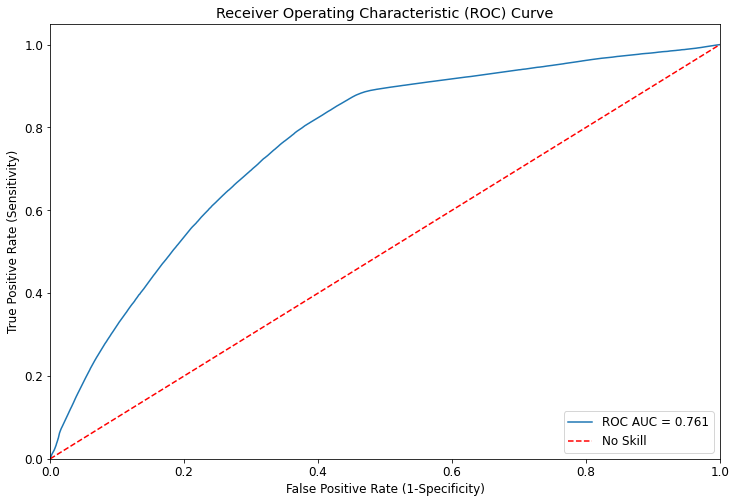

In [142]:
plot_roc_curve(y_test, y_pred_prob_logreg_clf_grid)

#### Plot Precision-Recall Curve
- A model with perfect skill is depicted as a point at (1, 1)
- A skillful model is represented by a curve that bows towards (1, 1) above the flat line of no skill

Average Precision (AP) Score: 0.639
F1 Score: 0.636


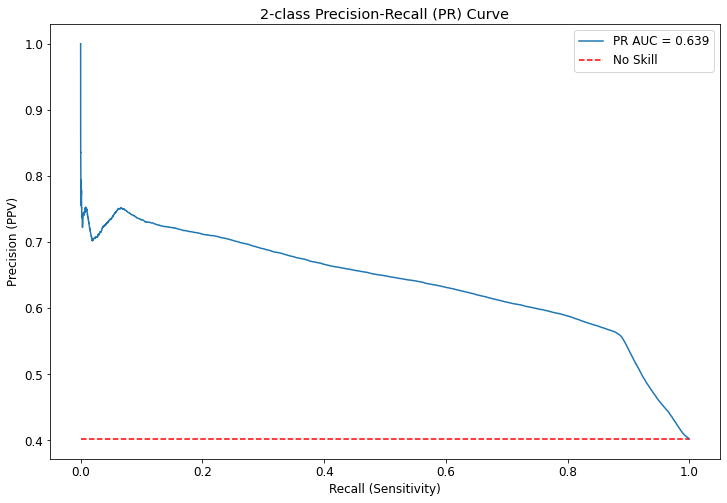

In [143]:
plot_precision_recall_curve(y_test, y_pred_prob_logreg_clf_grid, y_pred_class_logreg_clf_grid)

### Using Random Forests for Classification

#### Build and train random forest classification models

Note: <br>
- `RandomForestClassifier` does not support missing values for targets.
- Categorical predictor variables must be converted to numeric variables with integer values in order to use `RandomForestClassifier`.

In [144]:
# Count the missing values in each column of a DataFrame - sum() works because True is 1 and False is 0
null_counts = chicago_crime.isnull().sum()
total_counts = chicago_crime.isnull().count()
missing_percentage = round(null_counts/total_counts*100, 2)
missing_df = pd.DataFrame({'null_count': null_counts, 'percentage': missing_percentage})
missing_df[missing_df.null_count > 0]

,null_count,percentage
location_description,5013,0.07
ward,614766,8.94
community_area,613437,8.92
x_coordinate,64968,0.94
y_coordinate,64968,0.94
latitude,64968,0.94
longitude,64968,0.94
lat_long,64968,0.94


Convert `location_description_cat` into a numeric variable of integer values.

In [145]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'location_description_cat', bar=False)

location_description_cat,counts,percentage
STREET,1798028,26.15
RESIDENCE,1164770,16.94
OTHER,1112276,16.18
APARTMENT,715525,10.41
SIDEWALK,674226,9.81
PARKING LOT/GARAGE(NON.RESID.),197408,2.87
ALLEY,153088,2.23
"SCHOOL, PUBLIC, BUILDING",144323,2.10
RESIDENCE-GARAGE,133047,1.93
SMALL RETAIL STORE,122737,1.79


In [146]:
# Map values of Series using input correspondence (i.e., map existing input values to new outputs values)
chicago_crime['location_description_cat_num'] = chicago_crime.location_description_cat.map({'STREET':1, 'RESIDENCE':2, 'OTHER':3, 'APARTMENT':4, 'SIDEWALK':5, 'PARKING LOT/GARAGE(NON.RESID.)':6, 'ALLEY':7, 'SCHOOL, PUBLIC, BUILDING':8, 'RESIDENCE-GARAGE':9, 'SMALL RETAIL STORE':10,
                                                                                            'RESIDENCE PORCH/HALLWAY':11, 'VEHICLE NON-COMMERCIAL':12, 'RESTAURANT':13, 'GROCERY FOOD STORE':14, 'DEPARTMENT STORE':15, 'GAS STATION':16, 'RESIDENTIAL YARD (FRONT/BACK)':17})



In [147]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'location_description_cat_num', bar=False)

location_description_cat_num,counts,percentage
1,1798028,26.15
2,1164770,16.94
3,1112276,16.18
4,715525,10.41
5,674226,9.81
6,197408,2.87
7,153088,2.23
8,144323,2.10
9,133047,1.93
10,122737,1.79


Convert `district` into a numeric variable of integer values.

In [148]:
chicago_crime.district.dtype

dtype('float64')

In [149]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'district', bar=False)

district,counts,percentage
8.000000,466902,6.79
11.000000,441055,6.41
7.000000,405313,5.89
6.000000,396756,5.77
25.000000,396116,5.76
4.000000,389527,5.67
3.000000,349137,5.08
9.000000,340929,4.96
12.000000,336801,4.90
2.000000,325978,4.74


In [150]:
# Map values of Series using input correspondence (i.e., map existing input values to new outputs values)
# chicago_crime['district_num'] = chicago_crime.district.map({1.0:1, 2.0:2, 3.0:3, 4.0:4, 5.0:5, 6.0:6, 7.0:7, 8.0:8, 9.0:9, 10.0:10,
#                                                            11.0:11, 12.0:12, 14.0:13, 15.0:14, 16.0:15, 17.0:16, 18.0:17, 19.0:18, 20.0:19, 22.0:20,
#                                                            24.0:21, 25.0:22})

In [151]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
#chicago_crime.district_num.value_counts(sort=False)

Convert `year` into a numeric variable of integer values.

In [152]:
chicago_crime.year.dtype

dtype('int64')

In [153]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
value_counts_func(chicago_crime, 'year', bar=False)

year,counts,percentage
2002,486744,7.08
2001,485732,7.06
2003,475933,6.92
2004,469370,6.83
2005,453716,6.60
2006,448111,6.52
2007,437010,6.36
2008,427036,6.21
2009,392682,5.71
2010,370299,5.39


In [154]:
# Map values of Series using input correspondence (i.e., map existing input values to new outputs values)
# chicago_crime['year_num'] = chicago_crime.year.map({2001:1, 2002:2, 2003:3, 2004:4, 2005:5, 2006:6, 2007:7, 2008:8, 2009:9, 2010:10,
#                                                    2011:11, 2012:12, 2013:13, 2014:14, 2015:15, 2016:16, 2017:17, 2018:18, 2019:19})

In [155]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
# chicago_crime.year_num.value_counts(sort=False)

### Building Phase

In [156]:
# Create a list of features
feature_cols = ['arrest', 'domestic',
                'location_description_cat_num',
                'district',
                'year']

In [157]:
# Create X and y
X = chicago_crime[feature_cols]
y = chicago_crime.index_offense

In [158]:
# Split X and y into random training and testing subsets
# --> Generate stratified train and test sets for classification
# Note: train_size: between 0.0 and 1.0 and represent the proportion of the dataset to include in the train split
#       test_size: between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split
#       random_state: the seed used by the random number generator
#       stratify: if not None, data is split in a stratified fashion, using this as the class labels
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, test_size=0.30, random_state=65, stratify=y)

print('Length of X_train: {}'.format(len(X_train)))
print('Length of y_train: {}'.format(len(y_train)))
print('Length of X_test: {}'.format(len(X_test)))
print('Length of y_test: {}'.format(len(y_test)))

Length of X_train: 4813162
Length of y_train: 4813162
Length of X_test: 2062784
Length of y_test: 2062784


#### Compute Baseline Accuracy
[How to Get Baseline Results and Why They Matter](https://machinelearningmastery.com/how-to-get-baseline-results-and-why-they-matter/)

In [159]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
print(y_train.value_counts())
print()

most_freq_class = y_train.value_counts().index[0]
print('Most frequent class in training dataset:', most_freq_class)
print()

print('Baseline accuracy in test dataset:', round(y_test.value_counts()[most_freq_class] / y_test.count(), 3))
class_0_prob = y_test.value_counts()[0] / y_test.count()
class_1_prob = y_test.value_counts()[1] / y_test.count()

# Instantiate a classifier that makes predictions using simple rules and fit dummy classifier
# Note: stragegy: strategy to use to generate predictions
#       random_state: the seed used by the random number generator
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=0)
dummy_clf.fit(X_train, y_train)
print('Baseline accuracy in test dataset:', round(dummy_clf.score(X_test, y_test), 3))

0    2877355
1    1935807
Name: index_offense, dtype: int64

Most frequent class in training dataset: 0

Baseline accuracy in test dataset: 0.598
Baseline accuracy in test dataset: 0.598


Note: Creating train/test as arrays for purpose of running code below: 'Understanding a single decision tree structure from a random forest'. DataFrames do not work for this code.

In [160]:
X_train_array = X_train.values
X_test_array = X_test.values
y_train_array = y_train.values
y_test_array = y_test.values

#### Perform training with Gini Index criteria

In [161]:
# Instantiate a random forest classifier and build a forest of trees from the training set (X, y)
# Note: n_estimators: number of trees in the forest
#       criterion: function to measure the quality of a split; supported criteria are "gini" for the Gini impurity 
#                  and "entropy" for the information gain
#       max_depth: maximum depth of the tree; if None, then nodes are expanded until all leaves are pure or 
#                  until all leaves contain less than min_samples_split samples
#       n_jobs: number of jobs to run in parallel for both `fit` and `predict`; if -1, then the number of jobs is 
#               set to the number of cores
#       random_state: the seed used by the random number generator
rf_gini_clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=3, n_jobs=-1, random_state=46)
rf_gini_clf.fit(X_train_array, y_train_array)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=46, verbose=0,
                       warm_start=False)

In [162]:
# Predicted class value for X using random forest classifier
# Note: The predicted class of an input sample is a vote by the trees in the forest, weighted by their probability 
#       estimates. That is, the predicted class is the one with highest mean probability estimate across the trees
#y_pred_class_rf_gini_clf = rf_gini_clf.predict(X_test_array)
#y_pred_class_rf_gini_clf

In [163]:
# Predicted class probability estimates of the input samples X
# Note: The predicted class probabilities of an input sample are computed as the mean predicted class probabilities
#       of the trees in the forest. The class probability of a single tree is the fraction of samples of the same class in a leaf
#y_pred_prob_rf_gini_clf = rf_gini_clf.predict_proba(X_test_array)[:, 1]
#y_pred_prob_rf_gini_clf = rf_gini_clf.predict_proba(X_test_array)
#y_pred_prob_rf_gini_clf

#### [Calibrate Probabilities of Classification Model](https://machinelearningmastery.com/calibrated-classification-model-in-scikit-learn/)

In [164]:
# Probability calibration with isotonic regression or sigmoid
# Note: base_estimator: the classifier whose output decision function needs to be calibrated to 
#                       offer more accurate predict_proba outputs
#       method: method to use for calibration; 'sigmoid' or 'isotonic'; 'sigmoid' corresponds to Platt's method;
#               'isotonic' is a non-parametric approach; not advised to use isotonic with too few calibration samples
#       cv: determines the cross-validation splitting strategy
calibrated_rf_gini_clf = CalibratedClassifierCV(base_estimator=rf_gini_clf, method='sigmoid', cv=5)

# Fit the calibrated model
calibrated_rf_gini_clf.fit(X_train_array, y_train_array)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True,
                                                             ccp_alpha=0.0,
                                                             class_weight=None,
                                                             criterion='gini',
                                                             max_depth=3,
                                                             max_features='auto',
                                                             max_leaf_nodes=None,
                                                             max_samples=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_split=None,
                                                             min_samples_leaf=1,
                                                             min_samples_split=2,
                                  

#### Perform training with “entropy” criteria for Information Gain

In [165]:
# Instantiate a random forest classifier and build a forest of trees from the training set (X, y)
# Note: n_estimators: number of trees in the forest
#       criterion: function to measure the quality of a split; supported criteria are "gini" for the Gini impurity 
#                  and "entropy" for the information gain
#       max_depth: maximum depth of the tree; if None, then nodes are expanded until all leaves are pure or 
#                  until all leaves contain less than min_samples_split samples
#       n_jobs: number of jobs to run in parallel for both `fit` and `predict`; if -1, then the number of jobs is 
#               set to the number of cores
#       random_state: the seed used by the random number generator
rf_entropy_clf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=3, n_jobs=-1, random_state=46)
rf_entropy_clf.fit(X_train_array, y_train_array)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=46, verbose=0,
                       warm_start=False)

In [166]:
# Predicted class value for X using random forest classifier
# Note: The predicted class of an input sample is a vote by the trees in the forest, weighted by their probability 
#       estimates. That is, the predicted class is the one with highest mean probability estimate across the trees
#y_pred_class_rf_entropy_clf = rf_entropy_clf.predict(X_test_array)
#y_pred_class_rf_entropy_clf

In [167]:
# Predicted class probability estimates of the input samples X
# Note: The predicted class probabilities of an input sample are computed as the mean predicted class probabilities
#       of the trees in the forest. The class probability of a single tree is the fraction of samples of the same class in a leaf
#y_pred_prob_rf_entropy_clf = rf_entropy_clf.predict_proba(X_test_array)[:, 1]
#y_pred_prob_rf_entropy_clf = rf_entropy_clf.predict_proba(X_test_array)
#y_pred_prob_rf_entropy_clf

#### [Calibrate Probabilities of Classification Model](https://machinelearningmastery.com/calibrated-classification-model-in-scikit-learn/)

In [168]:
# Probability calibration with isotonic regression or sigmoid
# Note: base_estimator: the classifier whose output decision function needs to be calibrated to 
#                       offer more accurate predict_proba outputs
#       method: method to use for calibration; 'sigmoid' or 'isotonic'; 'sigmoid' corresponds to Platt's method;
#               'isotonic' is a non-parametric approach; not advised to use isotonic with too few calibration samples
#       cv: determines the cross-validation splitting strategy
calibrated_rf_entropy_clf = CalibratedClassifierCV(base_estimator=rf_entropy_clf, method='sigmoid', cv=5)

# Fit the calibrated model
calibrated_rf_entropy_clf.fit(X_train_array, y_train_array)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True,
                                                             ccp_alpha=0.0,
                                                             class_weight=None,
                                                             criterion='entropy',
                                                             max_depth=3,
                                                             max_features='auto',
                                                             max_leaf_nodes=None,
                                                             max_samples=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_split=None,
                                                             min_samples_leaf=1,
                                                             min_samples_split=2,
                               

### Operational Phase

#### Prediction using Random Forest Gini Index Criteria

In [169]:
model_type_text='Random Forest Model with Gini Index Criteria'
y_pred_class_calibrated_rf_gini_clf, y_pred_prob_calibrated_rf_gini_clf = prediction(X_test_array, calibrated_rf_gini_clf, model_type_text)
eval_metrics(y_test_array, y_pred_class_calibrated_rf_gini_clf, y_pred_prob_calibrated_rf_gini_clf, calibrated_rf_gini_clf)

Results Using Random Forest Model with Gini Index Criteria:
Predicted values:
[1 1 1 ... 1 1 1]

Training accuracy score: 0.6779
Testing accuracy score : 0.6778
Testing accuracy < Training accuracy
-> Overfitting!

Confusion Matrix:
            Pred No HR  Pred HR
True No HR      756349   476803
True HR         187814   641818

Performance Measures:
          Pred (0) Pred (1)    Total
True (0)      TN       FP    TN + FP
True (1)      FN       TP    FN + TP
Total      TN + FN  FP + TP         

Sensitivity (Recall)                        = TP/(TP + FN) = 0.7736
Specificity                                 = TN/(FP + TN) = 0.6133
Precision (Positive Predictive Value (PPV)) = TP/(TP + FP) = 0.5738
Negative Predictive Value (NPV))            = TN/(FN + TN) = 0.8011
F1 Score                                    = 2*(Precision*Recall)/(Precision + Recall) = 0.6589

Accuracy = (TP + TN)/(TP + TN + FP + FN) = 0.6778

Classification Report:
              precision    recall  f1-score   support



#### Prediction using Random Forest Entropy Criteria

In [170]:
model_type_text='Random Forest Model with Entropy Criteria'
y_pred_class_calibrated_rf_entropy_clf, y_pred_prob_calibrated_rf_entropy_clf = prediction(X_test_array, calibrated_rf_entropy_clf, model_type_text)
eval_metrics(y_test_array, y_pred_class_calibrated_rf_entropy_clf, y_pred_prob_calibrated_rf_entropy_clf, calibrated_rf_entropy_clf)

Results Using Random Forest Model with Entropy Criteria:
Predicted values:
[1 1 1 ... 1 1 1]

Training accuracy score: 0.6752
Testing accuracy score : 0.6751
Testing accuracy < Training accuracy
-> Overfitting!

Confusion Matrix:
            Pred No HR  Pred HR
True No HR      746434   486718
True HR         183516   646116

Performance Measures:
          Pred (0) Pred (1)    Total
True (0)      TN       FP    TN + FP
True (1)      FN       TP    FN + TP
Total      TN + FN  FP + TP         

Sensitivity (Recall)                        = TP/(TP + FN) = 0.7788
Specificity                                 = TN/(FP + TN) = 0.6053
Precision (Positive Predictive Value (PPV)) = TP/(TP + FP) = 0.5704
Negative Predictive Value (NPV))            = TN/(FN + TN) = 0.8027
F1 Score                                    = 2*(Precision*Recall)/(Precision + Recall) = 0.6585

Accuracy = (TP + TN)/(TP + TN + FP + FN) = 0.6751

Classification Report:
              precision    recall  f1-score   support

   

#### Optimize model using random-search with cross-validation

[Hyperparameter Tuning the Random Forest in Python](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)

In [171]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]

# Function to measure the quality of a split
criterion = ['gini', 'entropy']

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'criterion': criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'criterion': ['gini', 'entropy'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [172]:
# Instantiate a random forest classifier
# Note: random_state: the seed used by the random number generator
rf = RandomForestClassifier(random_state=46)

In [173]:
# Instantiate a randomized search on hyper parameters for an estimator and fit with a fixed number of parameter settings
# Note: estimator: estimator object
#       param_distributions: dictionary with parameters names (string) as keys and distributions or lists of parameters to try
#       n_iter: number of parameter settings that are sampled; n_iter trades off runtime vs quality of the solution
#       n_jobs: number of jobs to run in parallel; if -1, then the number of jobs is set to the number of cores
#       cv: number of folds in k-fold cross-validation
#       return_train_score: if False, the cv_results_ attribute will not include training scores
#rf_clf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, n_jobs=-1, cv=5, return_train_score=True)
#search_time_start = time.time()
#rf_clf_random.fit(X_train_array, y_train_array)
#print('Grid search time:', int((time.time() - search_time_start)/60), 'mins')

#rf_clf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, n_jobs=-1, cv=3, return_train_score=True)
#search_time_start = time.time()
#rf_clf_random.fit(X_train_array, y_train_array)
#print('Grid search time:', int((time.time() - search_time_start)/60), 'mins')

Models did not complete after 2 days even after reducing number of folds from 5 to 3 in order to complete task in a reasonable timeframe 

In [174]:
#print('Best parameter setting found by randomized search:')
#print(rf_clf_random.best_params_)
#print()
#print('Best mean cross-validated score found by randomized search:')
#print(round(rf_clf_random.best_score_, 3))

We can further improve our results by using grid search to focus on the most promising hyperparameters ranges found in the random search.

#### Optimize model using grid-search with cross-validation

In [175]:
# Create the parameter grid
parameters = {'n_estimators': [30, 50, 100],
              'criterion': ['gini', 'entropy'],
              'max_depth': [2, 3, 4]}

pprint(parameters)

{'criterion': ['gini', 'entropy'],
 'max_depth': [2, 3, 4],
 'n_estimators': [30, 50, 100]}


In [176]:
# Instantiate an exhaustive search over specified parameter values for an estimator and run fit with all sets of parameters
# Note: estimator: estimator object
#       param_grid: dictionary with parameters names (string) as keys and lists of parameter settings to try as values; 
#                   this enables searching over any sequence of parameter settings
#       scoring: a single string or a callable to evaluate the predictions on the test set
#       n_jobs: number of jobs to run in parallel; if -1, then the number of jobs is set to the number of cores
#       cv: number of folds in k-fold cross-validation
#       return_train_score: if False, the cv_results_ attribute will not include training scores
rf_clf_grid = GridSearchCV(estimator=rf, param_grid=parameters, scoring='roc_auc', 
                           n_jobs=-1, cv=5, return_train_score=True)
search_time_start = time.time()
rf_clf_grid.fit(X_train_array, y_train_array)
print('Grid search time:', int((time.time() - search_time_start)/60), 'mins')

Grid search time: 72 mins


In [177]:
results = pd.DataFrame.from_dict(rf_clf_grid.cv_results_)
pd.DataFrame.from_dict(rf_clf_grid.cv_results_, orient='index')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
mean_fit_time,155.40195999145507,251.81018328666687,473.4055366039276,203.96679515838622,305.948416852951,608.2929069519043,241.98879098892212,386.91625051498414,779.3172339439392,126.95484461784363,219.8707727909088,423.71863355636594,177.47703652381898,294.1512677669525,602.4563697814941,238.47066316604614,371.0664850711822,471.9655992031097
std_fit_time,0.22830938662562286,0.1552352459981535,11.99364458385017,5.460517196292294,9.818479711309623,4.313816595865443,2.674879345333112,7.1812657829742195,1.188016801823817,1.5506920937786643,1.184853855158943,6.342811186240067,2.1527682865830315,3.8570763646120128,2.0565287661703344,1.1623977312495977,15.512392330320466,35.11642635463977
mean_score_time,4.968054008483887,7.4353173732757565,12.83089632987976,4.893839406967163,7.744564247131348,13.12342448234558,5.760174989700317,7.856362247467041,14.160060405731201,4.964091825485229,7.1814202785491945,13.06234426498413,4.926369714736938,8.079675340652466,13.302236032485961,5.502398872375489,6.333758544921875,6.614372777938843
std_score_time,0.12252660872840987,0.10468940193400711,0.3291239135689332,0.5708841657600878,0.26886417406536584,1.0250651305188618,0.10045632147833954,0.5622096647816573,1.016079187290649,0.2836488036431867,0.41483910599306695,0.3672340363935245,0.18319071192262168,0.3676620422293787,0.3829506510395585,0.3185121231576132,0.6343353317871111,1.0773670133286797
param_criterion,gini,gini,gini,gini,gini,gini,gini,gini,gini,entropy,entropy,entropy,entropy,entropy,entropy,entropy,entropy,entropy
param_max_depth,2,2,2,3,3,3,4,4,4,2,2,2,3,3,3,4,4,4
param_n_estimators,30,50,100,30,50,100,30,50,100,30,50,100,30,50,100,30,50,100
params,"{'criterion': 'gini', 'max_depth': 2, 'n_estim...","{'criterion': 'gini', 'max_depth': 2, 'n_estim...","{'criterion': 'gini', 'max_depth': 2, 'n_estim...","{'criterion': 'gini', 'max_depth': 3, 'n_estim...","{'criterion': 'gini', 'max_depth': 3, 'n_estim...","{'criterion': 'gini', 'max_depth': 3, 'n_estim...","{'criterion': 'gini', 'max_depth': 4, 'n_estim...","{'criterion': 'gini', 'max_depth': 4, 'n_estim...","{'criterion': 'gini', 'max_depth': 4, 'n_estim...","{'criterion': 'entropy', 'max_depth': 2, 'n_es...","{'criterion': 'entropy', 'max_depth': 2, 'n_es...","{'criterion': 'entropy', 'max_depth': 2, 'n_es...","{'criterion': 'entropy', 'max_depth': 3, 'n_es...","{'criterion': 'entropy', 'max_depth': 3, 'n_es...","{'criterion': 'entropy', 'max_depth': 3, 'n_es...","{'criterion': 'entropy', 'max_depth': 4, 'n_es...","{'criterion': 'entropy', 'max_depth': 4, 'n_es...","{'criterion': 'entropy', 'max_depth': 4, 'n_es..."
split0_test_score,0.7353166755774082,0.7356641275842606,0.7369267189354063,0.7474082219319886,0.7494359943171687,0.7431065969545043,0.7552840666113946,0.7553095361521536,0.756616233106089,0.7358488424452689,0.7362183983362105,0.7372561797014823,0.7483382984261118,0.7492166378355823,0.7433912701601748,0.7551174936191887,0.7552055927110178,0.756548083210667
split1_test_score,0.7348133424325634,0.7351757743965996,0.7364066449127594,0.7471840700325996,0.749008159392708,0.7434450608039229,0.7535878106003041,0.7541867616059,0.755687703895275,0.7353692514236311,0.7356812190268003,0.7366460810639772,0.7478025620847168,0.7488874421093026,0.7439182968578697,0.7544873776368666,0.7546711928006253,0.7560606091009126


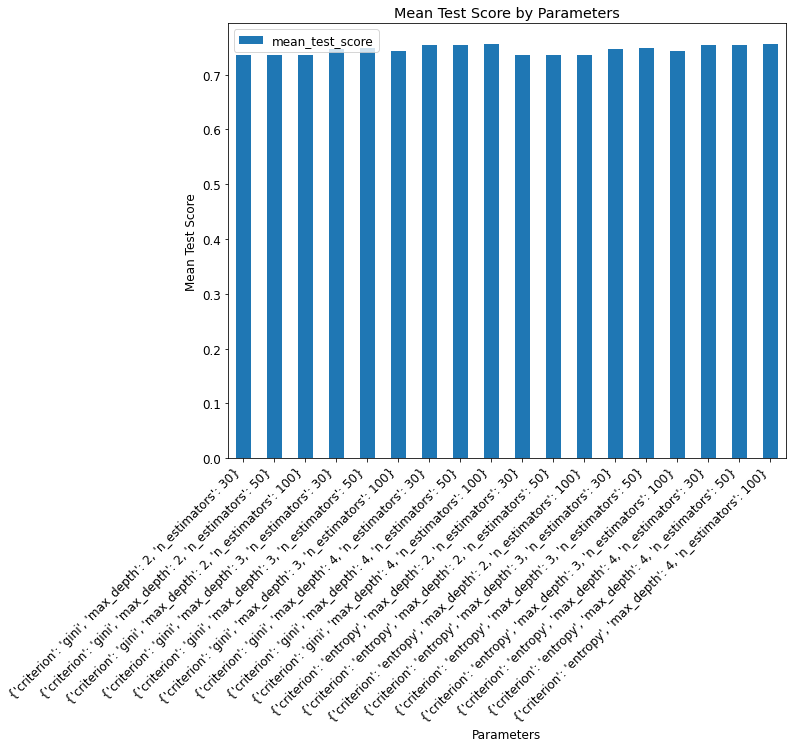

In [178]:
# Create a vertical bar plot by mean test score using matplotlib
# Note: figsize: a tuple (width, height) in inches
ax = results.plot.bar(y='mean_test_score', x='params', figsize=(10, 8));
ax.set_xticklabels(results.params, rotation=45, horizontalalignment='right');
plt.xlabel('Parameters');
plt.ylabel('Mean Test Score');
plt.title('Mean Test Score by Parameters');

In [179]:
print('Best parameter setting found by grid search:')
print(rf_clf_grid.best_params_)
print()
print('Best mean cross-validated score found by grid search:')
print(round(rf_clf_grid.best_score_, 3))

Best parameter setting found by grid search:
{'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 100}

Best mean cross-validated score found by grid search:
0.756


#### [Calibrate Probabilities of Classification Model](https://machinelearningmastery.com/calibrated-classification-model-in-scikit-learn/)

In [180]:
# Probability calibration with isotonic regression or sigmoid
# Note: method: method to use for calibration; 'sigmoid' or 'isotonic'; 'sigmoid' corresponds to Platt's method;
#               'isotonic' is a non-parametric approach; not advised to use isotonic with too few calibration samples
#       cv: determines the cross-validation splitting strategy
calibrated_rf_clf_grid = CalibratedClassifierCV(rf_clf_grid.best_estimator_, method='sigmoid', cv=5)

# Fit the calibrated model
calibrated_rf_clf_grid.fit(X_train_array, y_train_array)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True,
                                                             ccp_alpha=0.0,
                                                             class_weight=None,
                                                             criterion='entropy',
                                                             max_depth=4,
                                                             max_features='auto',
                                                             max_leaf_nodes=None,
                                                             max_samples=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_split=None,
                                                             min_samples_leaf=1,
                                                             min_samples_split=2,
                               

#### Prediction using Random Forest and Cross-Validation

In [181]:
model_type_text='Random Forest Model and Cross-Validation'
y_pred_class_calibrated_rf_clf_grid, y_pred_prob_calibrated_rf_clf_grid = prediction(X_test_array, calibrated_rf_clf_grid, model_type_text)
eval_metrics(y_test_array, y_pred_class_calibrated_rf_clf_grid, y_pred_prob_calibrated_rf_clf_grid, calibrated_rf_clf_grid)

Results Using Random Forest Model and Cross-Validation:
Predicted values:
[1 1 0 ... 1 1 1]

Training accuracy score: 0.6912
Testing accuracy score : 0.6909
Testing accuracy < Training accuracy
-> Overfitting!

Confusion Matrix:
            Pred No HR  Pred HR
True No HR      811424   421728
True HR         215872   613760

Performance Measures:
          Pred (0) Pred (1)    Total
True (0)      TN       FP    TN + FP
True (1)      FN       TP    FN + TP
Total      TN + FN  FP + TP         

Sensitivity (Recall)                        = TP/(TP + FN) = 0.7398
Specificity                                 = TN/(FP + TN) = 0.658
Precision (Positive Predictive Value (PPV)) = TP/(TP + FP) = 0.5927
Negative Predictive Value (NPV))            = TN/(FN + TN) = 0.7899
F1 Score                                    = 2*(Precision*Recall)/(Precision + Recall) = 0.6581

Accuracy = (TP + TN)/(TP + TN + FP + FN) = 0.6909

Classification Report:
              precision    recall  f1-score   support

     

#### Plot Receiver Operating Characteristic (ROC) Curve
- The curves of different models can be compared directly in general or for different thresholds
- The area under the curve (AUC) can be used as a summary of the model skill
- Smaller values on the x-axis of the plot indicate lower False Positives and higher True Negatives
- Larger values on the y-axis of the plot indicate higher True Positives and lower False Negatives


- A model with perfect skill is depicted at a point at (0,1)
- A model with perfect skill is represented by a line that travels from the bottom left of the plot to the top left and then across the top to the top right

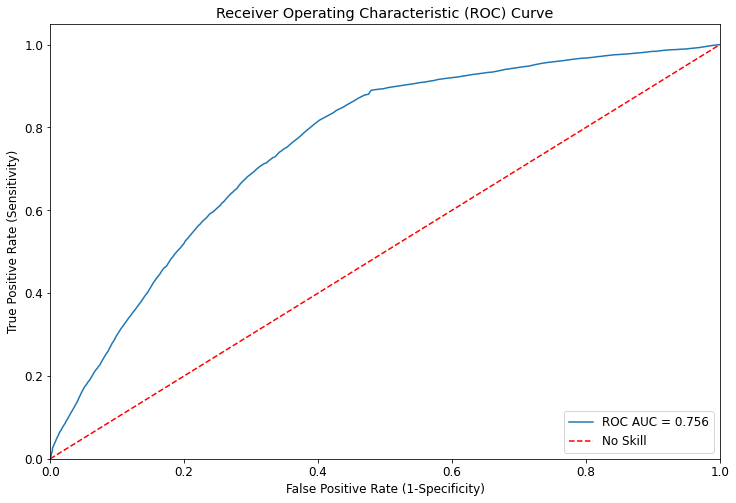

In [182]:
plot_roc_curve(y_test_array, y_pred_prob_calibrated_rf_clf_grid)

#### Plot Precision-Recall Curve
- A model with perfect skill is depicted as a point at (1, 1)
- A skillful model is represented by a curve that bows towards (1, 1) above the flat line of no skill

Average Precision (AP) Score: 0.631
F1 Score: 0.658


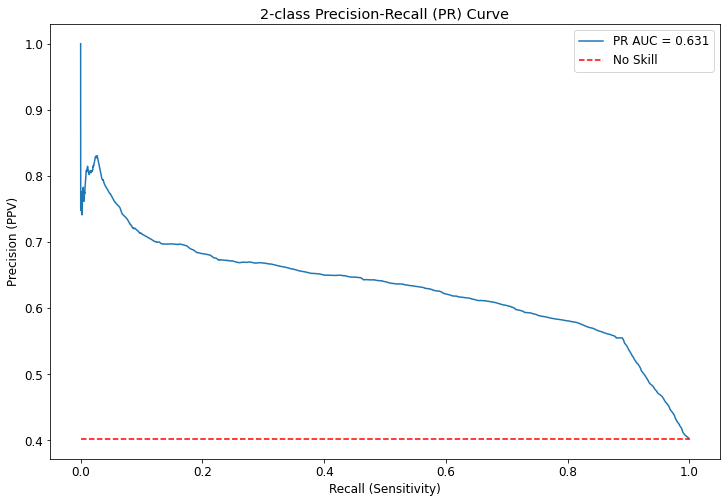

In [183]:
plot_precision_recall_curve(y_test_array, y_pred_prob_calibrated_rf_clf_grid, y_pred_class_calibrated_rf_clf_grid)

#### Understanding a single decision tree structure from a random forest
With a random forest, every tree will be built differently. Trees will be slightly different from one another!

In [184]:
# Extract single tree
estimator = rf_clf_grid.best_estimator_[50]

In [185]:
# The decision estimator has an attribute called tree_  which stores the entire
# tree structure and allows access to low level attributes. The binary tree
# tree_ is represented as a number of parallel arrays. The i-th element of each
# array holds information about the node `i`. Node 0 is the tree's root. NOTE:
# Some of the arrays only apply to either leaves or split nodes, resp. In this
# case the values of nodes of the other type are arbitrary!
#
# Among those arrays, we have:
#   - left_child, id of the left child of the node
#   - right_child, id of the right child of the node
#   - feature, feature used for splitting the node
#   - threshold, threshold value at the node
#

# Using those arrays, we can parse the tree structure:
n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold

# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print('The binary tree structure has %s nodes and has '
      'the following tree structure:'
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print('%snode=%s leaf node.' % (node_depth[i] * '\t', i))
    else:
        print('%snode=%s test node: go to node %s if X[:, %s] <= %s else to '
              'node %s.'
              % (node_depth[i] * '\t',
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))
print()

# First let's retrieve the decision path of each sample. The decision_path
# method allows to retrieve the node indicator functions. A non zero element of
# indicator matrix at the position (i, j) indicates that the sample i goes
# through the node j.
node_indicator = estimator.decision_path(X_test_array)

# Similarly, we can also have the leaves ids reached by each sample.
leave_id = estimator.apply(X_test_array)

# Now, it's possible to get the tests that were used to predict a sample or
# a group of samples. First, let's make it for the sample.
sample_id = 0
node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                    node_indicator.indptr[sample_id + 1]]

print('Rules used to predict sample %s: ' % sample_id)
for node_id in node_index:
    if leave_id[sample_id] == node_id:
        continue

    if (X_test_array[sample_id, feature[node_id]] <= threshold[node_id]):
        threshold_sign = '<='
    else:
        threshold_sign = '>'

    print('decision id node %s : (X_test[%s, %s] (= %s) %s %s)'
          % (node_id,
             sample_id,
             feature[node_id],
             X_test_array[sample_id, feature[node_id]],
             threshold_sign,
             threshold[node_id]))

# For a group of samples, we have the following common node.
sample_ids = [0, 1]
common_nodes = (node_indicator.toarray()[sample_ids].sum(axis=0) ==
                len(sample_ids))

common_node_id = np.arange(n_nodes)[common_nodes]

print('\nThe following samples %s share the node %s in the tree'
      % (sample_ids, common_node_id))
print('It is %s %% of all nodes.' % (100 * len(common_node_id) / n_nodes,))

The binary tree structure has 31 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 0] <= 0.5 else to node 16.
	node=1 test node: go to node 2 if X[:, 1] <= 0.5 else to node 9.
		node=2 test node: go to node 3 if X[:, 4] <= 2008.5 else to node 6.
			node=3 test node: go to node 4 if X[:, 3] <= 1.5 else to node 5.
				node=4 leaf node.
				node=5 leaf node.
			node=6 test node: go to node 7 if X[:, 4] <= 2013.5 else to node 8.
				node=7 leaf node.
				node=8 leaf node.
		node=9 test node: go to node 10 if X[:, 3] <= 15.5 else to node 13.
			node=10 test node: go to node 11 if X[:, 3] <= 7.5 else to node 12.
				node=11 leaf node.
				node=12 leaf node.
			node=13 test node: go to node 14 if X[:, 4] <= 2014.5 else to node 15.
				node=14 leaf node.
				node=15 leaf node.
	node=16 test node: go to node 17 if X[:, 3] <= 1.5 else to node 24.
		node=17 test node: go to node 18 if X[:, 2] <= 13.5 else to node 21.
			node=18 test node: go to node 19 if X[:, 4] 

In [186]:
# Export a decision tree in DOT format
# Generates a GraphViz representation of the decision tree, which is then written into `out_file`
# Once exported, graphical renderings can be generated
# Note: feature_names: list of strings, optional (default=None); names of each of the features
#       class_names: list of strings, bool or None, optional (default=None); names of each of the target classes in 
#                    ascending numerical order; only relevant for classification and not supported for multi-output
dot_data = export_graphviz(estimator, out_file=None,
                           feature_names=feature_cols,
                           class_names=['Non-Index Offense', 'Index Offense'],
                           filled=True, rounded=True,
                           special_characters=True)

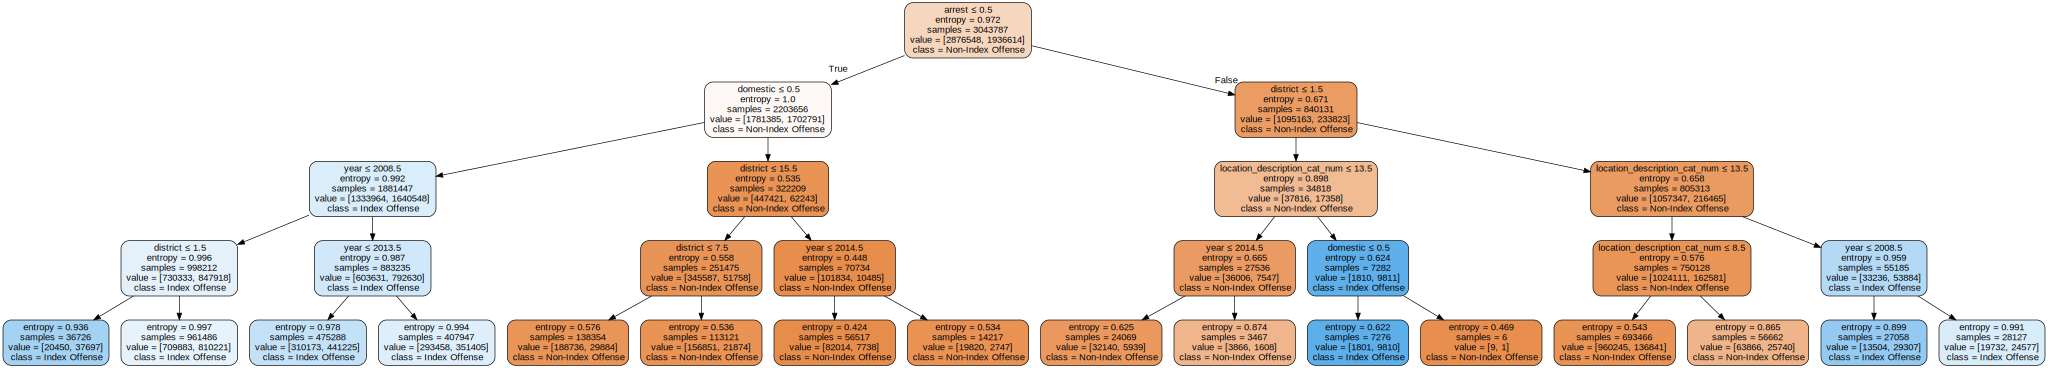

In [187]:
# Visualize decision tree
# Verbatim DOT source code string to be rendered by Graphviz
graph = graphviz.Source(dot_data)  
graph 

In [188]:
# Save the source to file and render with the Graphviz engine
# Note: view (bool): Open the rendered result with the default application
graph.render('index_offense', view=False)

'index_offense.pdf'

Note: Not needed anymore because 'graph.render' saves the source file after rendering

In [189]:
#with open('index_offense_classifier.txt', 'w') as f:
#    f = export_graphviz(estimator, out_file=f,
#                        feature_names=feature_cols,
#                        class_names=['Non-Index Offense', 'Index Offense'],
#                        filled=True, rounded=True,
#                        special_characters=True)

### Using Support Vector Machines for Classification

#### Build and train support vector classification models

Create dummy variables for `location_description_cat`, `district`, and `year`.<br>

Note: Dummy variables have already been created in order to perform logistic regression above.

In [190]:
chicago_crime.columns

Index(['date', 'block', 'iucr', 'primary_type', 'description',
       'location_description', 'arrest', 'domestic', 'beat', 'district',
       'ward', 'community_area', 'fbi_code', 'x_coordinate', 'y_coordinate',
       'year', 'updated_on', 'latitude', 'longitude', 'lat_long',
       'index_offense', 'nonindex_offense', 'location_description_cat',
       'location_ALLEY', 'location_APARTMENT', 'location_DEPARTMENT STORE',
       'location_GAS STATION', 'location_GROCERY FOOD STORE', 'location_OTHER',
       'location_PARKING LOT/GARAGE(NON.RESID.)', 'location_RESIDENCE',
       'location_RESIDENCE PORCH/HALLWAY', 'location_RESIDENCE-GARAGE',
       'location_RESIDENTIAL YARD (FRONT/BACK)', 'location_RESTAURANT',
       'location_SCHOOL, PUBLIC, BUILDING', 'location_SIDEWALK',
       'location_SMALL RETAIL STORE', 'location_VEHICLE NON-COMMERCIAL',
       'district_1.0', 'district_2.0', 'district_3.0', 'district_4.0',
       'district_5.0', 'district_6.0', 'district_7.0', 'district_9.0

### Building Phase

In [191]:
# Create a list of features
feature_cols = ['arrest', 'domestic',
                'location_ALLEY', 'location_APARTMENT', 'location_DEPARTMENT STORE', 'location_GAS STATION',
                'location_GROCERY FOOD STORE', 'location_OTHER', 'location_PARKING LOT/GARAGE(NON.RESID.)', 'location_RESIDENCE',
                'location_RESIDENCE PORCH/HALLWAY', 'location_RESIDENCE-GARAGE', 'location_RESIDENTIAL YARD (FRONT/BACK)',
                'location_RESTAURANT', 'location_SCHOOL, PUBLIC, BUILDING', 'location_SIDEWALK', 'location_SMALL RETAIL STORE',
                'location_VEHICLE NON-COMMERCIAL',
                'district_1.0', 'district_2.0', 'district_3.0', 'district_4.0', 'district_5.0', 'district_6.0',
                'district_7.0', 'district_9.0', 'district_10.0', 'district_11.0', 'district_12.0', 'district_14.0',
                'district_15.0', 'district_16.0', 'district_17.0', 'district_18.0','district_19.0', 'district_20.0',
                'district_22.0', 'district_24.0', 'district_25.0',
                'year_2002', 'year_2003', 'year_2004', 'year_2005', 'year_2006', 'year_2007', 'year_2008', 'year_2009',
                'year_2010', 'year_2011', 'year_2012', 'year_2013', 'year_2014', 'year_2015', 'year_2016', 'year_2017',
                'year_2018', 'year_2019']

In [192]:
# Create X and y
X = chicago_crime[feature_cols]
y = chicago_crime.index_offense

In [193]:
# Split X and y into random training and testing subsets
# --> Generate stratified train and test sets for classification
# Note: train_size: between 0.0 and 1.0 and represent the proportion of the dataset to include in the train split
#       test_size: between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split
#       random_state: the seed used by the random number generator
#       stratify: if not None, data is split in a stratified fashion, using this as the class labels
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, test_size=0.30, random_state=65, stratify=y)

print('Length of X_train: {}'.format(len(X_train)))
print('Length of y_train: {}'.format(len(y_train)))
print('Length of X_test: {}'.format(len(X_test)))
print('Length of y_test: {}'.format(len(y_test)))

Length of X_train: 4813162
Length of y_train: 4813162
Length of X_test: 2062784
Length of y_test: 2062784


#### Compute Baseline Accuracy
[How to Get Baseline Results and Why They Matter](https://machinelearningmastery.com/how-to-get-baseline-results-and-why-they-matter/)

In [194]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
print(y_train.value_counts())
print()

most_freq_class = y_train.value_counts().index[0]
print('Most frequent class in training dataset:', most_freq_class)
print()

print('Baseline accuracy in test dataset:', round(y_test.value_counts()[most_freq_class] / y_test.count(), 3))
class_0_prob = y_test.value_counts()[0] / y_test.count()
class_1_prob = y_test.value_counts()[1] / y_test.count()

# Instantiate a classifier that makes predictions using simple rules and fit dummy classifier
# Note: stragegy: strategy to use to generate predictions
#       random_state: the seed used by the random number generator
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=0)
dummy_clf.fit(X_train, y_train)
print('Baseline accuracy in test dataset:', round(dummy_clf.score(X_test, y_test), 3))

0    2877355
1    1935807
Name: index_offense, dtype: int64

Most frequent class in training dataset: 0

Baseline accuracy in test dataset: 0.598
Baseline accuracy in test dataset: 0.598


The `SVC` classifier doesn’t perform well when we have a very large dataset because the required training time is very high. Thus, the `LinearSVC` will be explored.

In [195]:
# Instantiate a C-Support Vector classifier and fit SVC model
# Note: C: penalty parameter C of the error term (default=1.0)
#       kernel: Specifies the kernel type to be used in the algorithm; it must be one of 'linear', 'poly',
#               'rbf' (default), 'sigmoid', 'precomputed' or a callable
#       gamma: kernel coefficient for 'rbf', 'poly' and 'sigmoid' (float, optional) (default='auto');
#              if gamma is 'auto' then 1/n_features will be used instead
#       random_state: the seed used by the random number generator
#svc_clf = SVC(C=1.0, kernel='linear', gamma='auto', random_state=46)
#svc_clf.fit(X_train, y_train)

In [196]:
# Instantiate a Linear Support Vector classifier and fit linear SVC model
# Note: penalty: 'l1' or 'l2' (default); specifies the norm used in the penalization; the 'l2' penalty is the standard
#                used in SVC; the 'l1' leads to ``coef_`` vectors that are sparse
#       dual: Select the algorithm to either solve the dual or primal optimization problem (default=True);
#             prefer dual=False when n_samples > n_features
#       C: penalty parameter C of the error term (default=1.0)
#       random_state: the seed used by the random number generator
linearsvc_clf = LinearSVC(penalty='l2', dual=False, C=1.0, random_state=46)
linearsvc_clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=46, tol=0.0001,
          verbose=0)

In [197]:
# Predict the class labels using the linear SVC model
y_pred_class_linearsvc_clf = linearsvc_clf.predict(X_test)

#### Get the coefficient for each feature

In [198]:
name = X.columns
coef = np.round(linearsvc_clf.coef_[0], 4)
pd.DataFrame([name, coef], index=['Name', 'Coefficient']).transpose()

,Name,Coefficient
0,arrest,-0.7202
1,domestic,-0.6472
2,location_ALLEY,-0.0797
3,location_APARTMENT,-0.1451
4,location_DEPARTMENT STORE,0.963
5,location_GAS STATION,0.0009
6,location_GROCERY FOOD STORE,0.6927
7,location_OTHER,-0.1186
8,location_PARKING LOT/GARAGE(NON.RESID.),0.1404
9,location_RESIDENCE,-0.2762


#### [Calibrate Probabilities of Classification Model](https://machinelearningmastery.com/calibrated-classification-model-in-scikit-learn/)

In [199]:
# Probability calibration with isotonic regression or sigmoid
# Note: base_estimator: the classifier whose output decision function needs to be calibrated to 
#                       offer more accurate predict_proba outputs
#       method: method to use for calibration; 'sigmoid' or 'isotonic'; 'sigmoid' corresponds to Platt's method;
#               'isotonic' is a non-parametric approach; not advised to use isotonic with too few calibration samples
#       cv: determines the cross-validation splitting strategy
calibrated_linearsvc_clf = CalibratedClassifierCV(base_estimator=linearsvc_clf, method='sigmoid', cv=5)

# Fit the calibrated model
calibrated_linearsvc_clf.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=LinearSVC(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                loss='squared_hinge',
                                                max_iter=1000,
                                                multi_class='ovr', penalty='l2',
                                                random_state=46, tol=0.0001,
                                                verbose=0),
                       cv=5, method='sigmoid')

### Operational Phase

#### Prediction using Linear SVC

In [200]:
model_type_text='Linear SVC Model'
y_pred_class_calibrated_linearsvc_clf, y_pred_prob_calibrated_linearsvc_clf = prediction(X_test, calibrated_linearsvc_clf, model_type_text)
eval_metrics(y_test, y_pred_class_calibrated_linearsvc_clf, y_pred_prob_calibrated_linearsvc_clf, calibrated_linearsvc_clf)

Results Using Linear SVC Model:
Predicted values:
[1 1 0 ... 1 1 1]

Training accuracy score: 0.7003
Testing accuracy score : 0.6997
Testing accuracy < Training accuracy
-> Overfitting!

Confusion Matrix:
            Pred No HR  Pred HR
True No HR      910446   322706
True HR         296844   532788

Performance Measures:
          Pred (0) Pred (1)    Total
True (0)      TN       FP    TN + FP
True (1)      FN       TP    FN + TP
Total      TN + FN  FP + TP         

Sensitivity (Recall)                        = TP/(TP + FN) = 0.6422
Specificity                                 = TN/(FP + TN) = 0.7383
Precision (Positive Predictive Value (PPV)) = TP/(TP + FP) = 0.6228
Negative Predictive Value (NPV))            = TN/(FN + TN) = 0.7541
F1 Score                                    = 2*(Precision*Recall)/(Precision + Recall) = 0.6323

Accuracy = (TP + TN)/(TP + TN + FP + FN) = 0.6997

Classification Report:
              precision    recall  f1-score   support

           0       0.75     

#### Optimize model using grid-search with cross-validation

In [201]:
# Create the parameter grid
parameters = {'penalty': ('l1', 'l2'),
              'C': [0.01, 0.1, 1.0, 10, 100]}

pprint(parameters)

{'C': [0.01, 0.1, 1.0, 10, 100], 'penalty': ('l1', 'l2')}


In [202]:
# Instantiate a Linear Support Vector classifier
# Note: penalty: 'l1' or 'l2' (default); specifies the norm used in the penalization; the 'l2' penalty is the standard
#                used in SVC; the 'l1' leads to ``coef_`` vectors that are sparse
#       dual: Select the algorithm to either solve the dual or primal optimization problem (default=True);
#             prefer dual=False when n_samples > n_features
#       C: penalty parameter C of the error term (default=1.0)
#       random_state: the seed used by the random number generator
linearsvc_clf = LinearSVC(dual=False, random_state=46)

In [203]:
# Instantiate an exhaustive search over specified parameter values for an estimator and run fit with all sets of parameters
# Note: estimator: estimator object
#       param_grid: dictionary with parameters names (string) as keys and lists of parameter settings to try as values; 
#                   this enables searching over any sequence of parameter settings
#       scoring: a single string or a callable to evaluate the predictions on the test set
#       n_jobs: number of jobs to run in parallel; if -1, then the number of jobs is set to the number of cores
#       cv: number of folds in k-fold cross-validation
#       return_train_score: if False, the cv_results_ attribute will not include training scores
linearsvc_clf_grid = GridSearchCV(estimator=linearsvc_clf, param_grid=parameters, scoring='roc_auc',
                                  n_jobs=-1, cv=5, return_train_score=True)
search_time_start = time.time()
linearsvc_clf_grid.fit(X_train, y_train)
print('Grid search time:', int((time.time() - search_time_start)/60), 'mins')

Grid search time: 24 mins


In [204]:
results = pd.DataFrame.from_dict(linearsvc_clf_grid.cv_results_)
pd.DataFrame.from_dict(linearsvc_clf_grid.cv_results_, orient='index')

,0,1,2,3,4,5,6,7,8,9
mean_fit_time,496.34669790267947,123.18118400573731,390.0104027271271,146.86322321891785,300.7610546112061,142.86224989891053,293.1313365936279,137.58652987480164,279.7389186382294,125.44077653884888
std_fit_time,6.805751082806383,10.758271445303295,13.51691268902208,28.499794539903284,29.283494993756506,7.3994663284125055,8.482526651165637,3.1884794633367166,12.216855989116876,9.022902603915512
mean_score_time,10.660526466369628,9.69020471572876,10.600235891342162,9.355127859115601,11.28455605506897,13.880840349197388,11.472193431854247,12.427897357940674,3.402394437789917,4.799990177154541
std_score_time,4.197529197574003,3.317317210749646,1.0227740690241134,1.518613563090037,0.9557116638998282,1.6446885077804725,0.5625707157337098,0.6595476550248633,2.653298966434434,1.6247983648133153
param_C,0.01,0.01,0.1,0.1,1.0,1.0,10,10,100,100
param_penalty,l1,l2,l1,l2,l1,l2,l1,l2,l1,l2
params,"{'C': 0.01, 'penalty': 'l1'}","{'C': 0.01, 'penalty': 'l2'}","{'C': 0.1, 'penalty': 'l1'}","{'C': 0.1, 'penalty': 'l2'}","{'C': 1.0, 'penalty': 'l1'}","{'C': 1.0, 'penalty': 'l2'}","{'C': 10, 'penalty': 'l1'}","{'C': 10, 'penalty': 'l2'}","{'C': 100, 'penalty': 'l1'}","{'C': 100, 'penalty': 'l2'}"
split0_test_score,0.7615138837928154,0.761521648223211,0.7615281558341835,0.7615273025057702,0.7615295118544597,0.7615278807405501,0.7615300327958323,0.761527932127328,0.761530036884692,0.7615279291919668
split1_test_score,0.7611717119288826,0.7611789619708531,0.7611847565942084,0.7611846209257537,0.7611867160152759,0.7611855678132018,0.7611868004450673,0.7611854255110098,0.7611868479359832,0.7611854244068829
split2_test_score,0.7618712844635939,0.7618769246359774,0.761882038793828,0.7618824450013203,0.761883421527669,0.7618838831885008,0.7618835933544751,0.7618831474701296,0.7618835941040265,0.7618832470168404


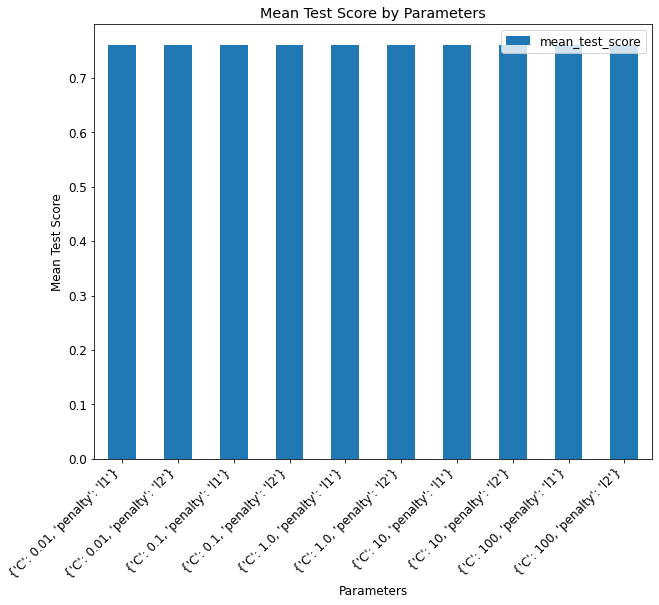

In [205]:
# Create a vertical bar plot by mean test score using matplotlib
# Note: figsize: a tuple (width, height) in inches
ax = results.plot.bar(y='mean_test_score', x='params', figsize=(10, 8));
ax.set_xticklabels(results.params, rotation=45, horizontalalignment='right');
plt.xlabel('Parameters');
plt.ylabel('Mean Test Score');
plt.title('Mean Test Score by Parameters');

In [206]:
print('Best parameter setting found by grid search:')
print(linearsvc_clf_grid.best_params_)
print()
print('Best mean cross-validated score found by grid search:')
print(round(linearsvc_clf_grid.best_score_, 3))

Best parameter setting found by grid search:
{'C': 100, 'penalty': 'l1'}

Best mean cross-validated score found by grid search:
0.761


#### [Calibrate Probabilities of Classification Model](https://machinelearningmastery.com/calibrated-classification-model-in-scikit-learn/)

In [207]:
# Probability calibration with isotonic regression or sigmoid
# Note: method: method to use for calibration; 'sigmoid' or 'isotonic'; 'sigmoid' corresponds to Platt's method;
#               'isotonic' is a non-parametric approach; not advised to use isotonic with too few calibration samples
#       cv: determines the cross-validation splitting strategy
calibrated_linearsvc_clf_grid = CalibratedClassifierCV(linearsvc_clf_grid.best_estimator_, method='sigmoid', cv=5)

# Fit the calibrated model
calibrated_linearsvc_clf_grid.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=LinearSVC(C=100, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                loss='squared_hinge',
                                                max_iter=1000,
                                                multi_class='ovr', penalty='l1',
                                                random_state=46, tol=0.0001,
                                                verbose=0),
                       cv=5, method='sigmoid')

#### Prediction using Linear SVC and Cross-Validation

In [208]:
model_type_text='Linear SVC Model and Cross-Validation'
y_pred_class_calibrated_linearsvc_clf_grid, y_pred_prob_calibrated_linearsvc_clf_grid = prediction(X_test, calibrated_linearsvc_clf_grid, model_type_text)
eval_metrics(y_test, y_pred_class_calibrated_linearsvc_clf_grid, y_pred_prob_calibrated_linearsvc_clf_grid, calibrated_linearsvc_clf_grid)

Results Using Linear SVC Model and Cross-Validation:
Predicted values:
[1 1 0 ... 1 1 1]

Training accuracy score: 0.7003
Testing accuracy score : 0.6997
Testing accuracy < Training accuracy
-> Overfitting!

Confusion Matrix:
            Pred No HR  Pred HR
True No HR      910446   322706
True HR         296844   532788

Performance Measures:
          Pred (0) Pred (1)    Total
True (0)      TN       FP    TN + FP
True (1)      FN       TP    FN + TP
Total      TN + FN  FP + TP         

Sensitivity (Recall)                        = TP/(TP + FN) = 0.6422
Specificity                                 = TN/(FP + TN) = 0.7383
Precision (Positive Predictive Value (PPV)) = TP/(TP + FP) = 0.6228
Negative Predictive Value (NPV))            = TN/(FN + TN) = 0.7541
F1 Score                                    = 2*(Precision*Recall)/(Precision + Recall) = 0.6323

Accuracy = (TP + TN)/(TP + TN + FP + FN) = 0.6997

Classification Report:
              precision    recall  f1-score   support

       

#### Plot Receiver Operating Characteristic (ROC) Curve
- The curves of different models can be compared directly in general or for different thresholds
- The area under the curve (AUC) can be used as a summary of the model skill
- Smaller values on the x-axis of the plot indicate lower False Positives and higher True Negatives
- Larger values on the y-axis of the plot indicate higher True Positives and lower False Negatives


- A model with perfect skill is depicted at a point at (0,1)
- A model with perfect skill is represented by a line that travels from the bottom left of the plot to the top left and then across the top to the top right

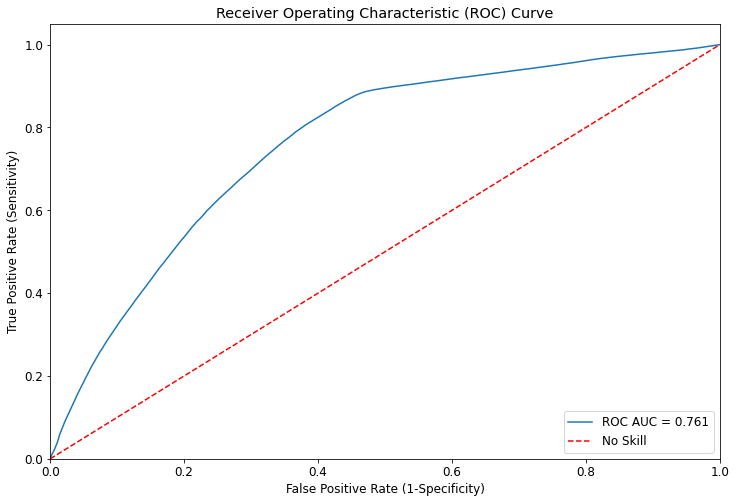

In [209]:
plot_roc_curve(y_test, y_pred_prob_calibrated_linearsvc_clf_grid)

#### Plot Precision-Recall Curve
- A model with perfect skill is depicted as a point at (1, 1)
- A skillful model is represented by a curve that bows towards (1, 1) above the flat line of no skill

Average Precision (AP) Score: 0.638
F1 Score: 0.632


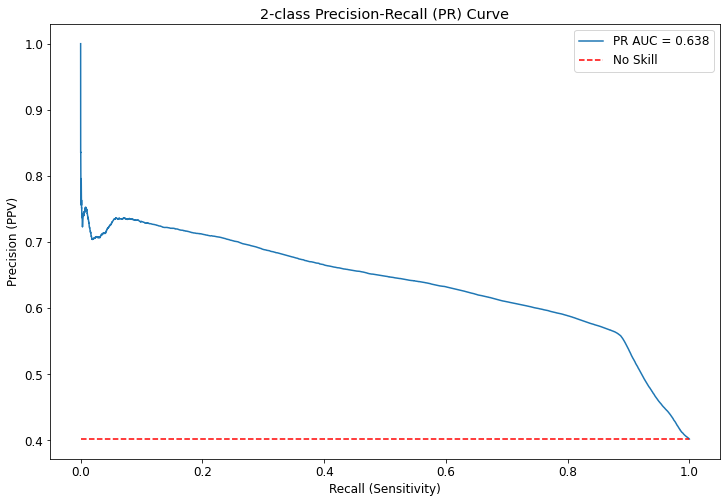

In [210]:
plot_precision_recall_curve(y_test, y_pred_prob_calibrated_linearsvc_clf_grid, y_pred_class_calibrated_linearsvc_clf_grid)

### Using XGBoost for Classification

#### Build and train XGBoost classification models

Note: <br>
- Categorical predictor variables must be converted to numeric variables with integer values in order to use `XGBClassifier`.

Note: Numeric variables have already been created in order to perform random forests above.

In [211]:
chicago_crime.columns

Index(['date', 'block', 'iucr', 'primary_type', 'description',
       'location_description', 'arrest', 'domestic', 'beat', 'district',
       'ward', 'community_area', 'fbi_code', 'x_coordinate', 'y_coordinate',
       'year', 'updated_on', 'latitude', 'longitude', 'lat_long',
       'index_offense', 'nonindex_offense', 'location_description_cat',
       'location_ALLEY', 'location_APARTMENT', 'location_DEPARTMENT STORE',
       'location_GAS STATION', 'location_GROCERY FOOD STORE', 'location_OTHER',
       'location_PARKING LOT/GARAGE(NON.RESID.)', 'location_RESIDENCE',
       'location_RESIDENCE PORCH/HALLWAY', 'location_RESIDENCE-GARAGE',
       'location_RESIDENTIAL YARD (FRONT/BACK)', 'location_RESTAURANT',
       'location_SCHOOL, PUBLIC, BUILDING', 'location_SIDEWALK',
       'location_SMALL RETAIL STORE', 'location_VEHICLE NON-COMMERCIAL',
       'district_1.0', 'district_2.0', 'district_3.0', 'district_4.0',
       'district_5.0', 'district_6.0', 'district_7.0', 'district_9.0

### Building Phase

In [212]:
# Create a list of features
feature_cols = ['arrest', 'domestic',
                'location_description_cat_num',
                'district',
                'year']

In [213]:
# Create X and y
X = chicago_crime[feature_cols]
y = chicago_crime.index_offense

In [214]:
# Split X and y into random training and testing subsets
# --> Generate stratified train and test sets for classification
# Note: train_size: between 0.0 and 1.0 and represent the proportion of the dataset to include in the train split
#       test_size: between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split
#       random_state: the seed used by the random number generator
#       stratify: if not None, data is split in a stratified fashion, using this as the class labels
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, test_size=0.30, random_state=65, stratify=y)

print('Length of X_train: {}'.format(len(X_train)))
print('Length of y_train: {}'.format(len(y_train)))
print('Length of X_test: {}'.format(len(X_test)))
print('Length of y_test: {}'.format(len(y_test)))

Length of X_train: 4813162
Length of y_train: 4813162
Length of X_test: 2062784
Length of y_test: 2062784


#### Compute Baseline Accuracy
[How to Get Baseline Results and Why They Matter](https://machinelearningmastery.com/how-to-get-baseline-results-and-why-they-matter/)

In [215]:
# Categorical column frequency
# Returns counts of unique values in descending order (first element is the most frequently-occurring element)
# Note: Excludes NA values by default
print(y_train.value_counts())
print()

most_freq_class = y_train.value_counts().index[0]
print('Most frequent class in training dataset:', most_freq_class)
print()

print('Baseline accuracy in test dataset:', round(y_test.value_counts()[most_freq_class] / y_test.count(), 3))
class_0_prob = y_test.value_counts()[0] / y_test.count()
class_1_prob = y_test.value_counts()[1] / y_test.count()

# Instantiate a classifier that makes predictions using simple rules and fit dummy classifier
# Note: stragegy: strategy to use to generate predictions
#       random_state: the seed used by the random number generator
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=0)
dummy_clf.fit(X_train, y_train)
print('Baseline accuracy in test dataset:', round(dummy_clf.score(X_test, y_test), 3))

0    2877355
1    1935807
Name: index_offense, dtype: int64

Most frequent class in training dataset: 0

Baseline accuracy in test dataset: 0.598
Baseline accuracy in test dataset: 0.598


In [216]:
# Instantiate a XGBoost classifier and fit XGBoost model
# Note: n_estimators: number of gradient boosted trees; equivalent to number of boosting rounds
#       max_depth: maximum tree depth for base learners
#       gamma: minimum loss reduction required to make a further partition on a leaf node of the tree
#       reg_lambda: (xgb's lambda) L2 regularization term on weights
#       learning_rate: boosting learning rate (xgb's "eta")
#       colsample_bytree: subsample ratio of columns when constructing each tree
#       n_jobs: number of parallel threads used to run xgboost
#       random_state: the seed used by the random number generator
xgb_clf = XGBClassifier(n_jobs=-1, random_state=46)
xgb_clf.fit(X_train, y_train)

[19:41:49] WARNING: /Users/travis/build/dmlc/xgboost/src/gbm/gbtree.cc:139: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=46, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='approx', validate_parameters=1, verbosity=None)

#### Get the importance for each feature

In [217]:
# Feature importances property
# Note: Feature importance is defined only for tree boosters
# Feature importance is only defined when the decision tree model is chosen as base learner (`booster=gbtree`)
# It is not defined for other base learner types, such as linear learners (`booster=gblinear`)
pd.DataFrame(xgb_clf.feature_importances_.reshape(1, -1), columns=X.columns)

,arrest,domestic,location_description_cat_num,district,year
0,0.3894043266773224,0.4971046447753906,0.09476299583911896,0.01132440660148859,0.007403619587421417


In [218]:
# Predict the class labels using the XGBoost model
#y_pred_class_xgb_clf = xgb_clf.predict(X_test)

#### [Calibrate Probabilities of Classification Model](https://machinelearningmastery.com/calibrated-classification-model-in-scikit-learn/)

In [219]:
# Probability calibration with isotonic regression or sigmoid
# Note: base_estimator: the classifier whose output decision function needs to be calibrated to 
#                       offer more accurate predict_proba outputs
#       method: method to use for calibration; 'sigmoid' or 'isotonic'; 'sigmoid' corresponds to Platt's method;
#               'isotonic' is a non-parametric approach; not advised to use isotonic with too few calibration samples
#       cv: determines the cross-validation splitting strategy
calibrated_xgb_clf = CalibratedClassifierCV(base_estimator=xgb_clf, method='sigmoid', cv=5)

# Fit the calibrated model
calibrated_xgb_clf.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    colsample_bylevel=1,
                                                    colsample_bynode=1,
                                                    colsample_bytree=1, gamma=0,
                                                    gpu_id=-1,
                                                    importance_type='gain',
                                                    interaction_constraints='',
                                                    learning_rate=0.300000012,
                                                    max_delta_step=0,
                                                    max_depth=6,
                                                    min_child_weight=1,
                                                    missing=nan,
                                                    monotone_const

### Operational Phase

#### Prediction using XGBoost

In [220]:
model_type_text='XGBoost Model'
y_pred_class_calibrated_xgb_clf, y_pred_prob_calibrated_xgb_clf = prediction(X_test, calibrated_xgb_clf, model_type_text)
eval_metrics(y_test, y_pred_class_calibrated_xgb_clf, y_pred_prob_calibrated_xgb_clf, calibrated_xgb_clf)

Results Using XGBoost Model:
Predicted values:
[1 1 0 ... 1 0 1]

Training accuracy score: 0.7084
Testing accuracy score : 0.7078
Testing accuracy < Training accuracy
-> Overfitting!

Confusion Matrix:
            Pred No HR  Pred HR
True No HR      911317   321835
True HR         280922   548710

Performance Measures:
          Pred (0) Pred (1)    Total
True (0)      TN       FP    TN + FP
True (1)      FN       TP    FN + TP
Total      TN + FN  FP + TP         

Sensitivity (Recall)                        = TP/(TP + FN) = 0.6614
Specificity                                 = TN/(FP + TN) = 0.739
Precision (Positive Predictive Value (PPV)) = TP/(TP + FP) = 0.6303
Negative Predictive Value (NPV))            = TN/(FN + TN) = 0.7644
F1 Score                                    = 2*(Precision*Recall)/(Precision + Recall) = 0.6455

Accuracy = (TP + TN)/(TP + TN + FP + FN) = 0.7078

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.7

#### Plot Receiver Operating Characteristic (ROC) Curve
- The curves of different models can be compared directly in general or for different thresholds
- The area under the curve (AUC) can be used as a summary of the model skill
- Smaller values on the x-axis of the plot indicate lower False Positives and higher True Negatives
- Larger values on the y-axis of the plot indicate higher True Positives and lower False Negatives


- A model with perfect skill is depicted at a point at (0,1)
- A model with perfect skill is represented by a line that travels from the bottom left of the plot to the top left and then across the top to the top right

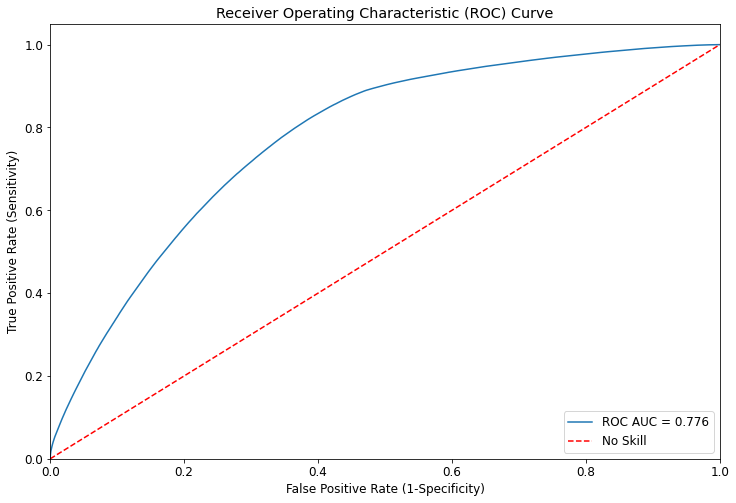

In [221]:
plot_roc_curve(y_test, y_pred_prob_calibrated_xgb_clf)

#### Plot Precision-Recall Curve
- A model with perfect skill is depicted as a point at (1, 1)
- A skillful model is represented by a curve that bows towards (1, 1) above the flat line of no skill

Average Precision (AP) Score: 0.666
F1 Score: 0.645


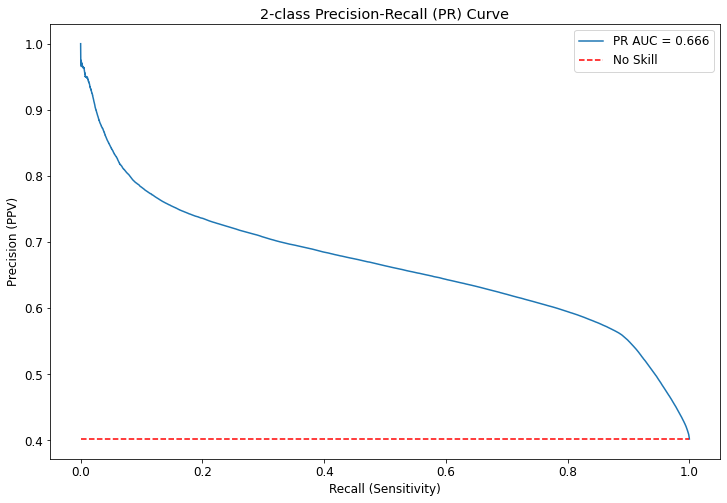

In [222]:
plot_precision_recall_curve(y_test, y_pred_prob_calibrated_xgb_clf, y_pred_class_calibrated_xgb_clf)

#### Optimize model using grid-search with cross-validation

In [223]:
# Create the parameter grid
# parameters = {'n_estimators': [50, 100, 150, 200],
#               'learning_rate': [0.01, 0.1, 0.2, 0.3],
#               'max_depth': [i for i in range(3, 7)],
#               'colsample_bytree': [i/10.0 for i in range(1, 3)],
#               'gamma': [i/10.0 for i in range(3)]}

# pprint(parameters)

In [224]:
# Instantiate a XGBoost classifier and fit XGBoost model
# Note: n_estimators: number of gradient boosted trees; equivalent to number of boosting rounds
#       max_depth: maximum tree depth for base learners
#       gamma: minimum loss reduction required to make a further partition on a leaf node of the tree
#       reg_lambda: L2 regularization term on weights (xgb's "lambda") 
#       learning_rate: boosting learning rate (xgb's "eta")
#       colsample_bytree: subsample ratio of columns when constructing each tree
#       random_state: the seed used by the random number generator
# xgb_clf = XGBClassifier(random_state=46)

In [225]:
# Instantiate an exhaustive search over specified parameter values for an estimator and run fit with all sets of parameters
# Note: estimator: estimator object
#       param_grid: dictionary with parameters names (string) as keys and lists of parameter settings to try as values; 
#                   this enables searching over any sequence of parameter settings
#       scoring: a single string or a callable to evaluate the predictions on the test set
#       n_jobs: number of jobs to run in parallel; if -1, then the number of jobs is set to the number of cores
#       cv: number of folds in k-fold cross-validation
#       return_train_score: if False, the cv_results_ attribute will not include training scores
# xgb_clf_grid = GridSearchCV(estimator=xgb_clf, param_grid=parameters, scoring='roc_auc',
#                             n_jobs=-1, cv=5, return_train_score=True)
# search_time_start = time.time()
# xgb_clf_grid.fit(X_train, y_train)
# print('Grid search time:', int((time.time() - search_time_start)/60), 'mins')

In [226]:
# results = pd.DataFrame.from_dict(xgb_clf_grid.cv_results_)
# pd.DataFrame.from_dict(xgb_clf_grid.cv_results_, orient='index')

In [227]:
# Create a vertical bar plot by mean test score using matplotlib
# Note: figsize: a tuple (width, height) in inches
# ax = results.plot.bar(y='mean_test_score', x='params', figsize=(10, 8));
# ax.set_xticklabels(results.params, rotation=45, horizontalalignment='right');
# plt.xlabel('Parameters');
# plt.ylabel('Mean Test Score');
# plt.title('Mean Test Score by Parameters');

In [228]:
# print('Best parameter setting found by grid search:')
# print(xgb_clf_grid.best_params_)
# print()
# print('Best mean cross-validated score found by grid search:')
# print(round(xgb_clf_grid.best_score_, 3))

#### [Calibrate Probabilities of Classification Model](https://machinelearningmastery.com/calibrated-classification-model-in-scikit-learn/)

In [229]:
# Probability calibration with isotonic regression or sigmoid
# Note: method: method to use for calibration; 'sigmoid' or 'isotonic'; 'sigmoid' corresponds to Platt's method;
#               'isotonic' is a non-parametric approach; not advised to use isotonic with too few calibration samples
#       cv: determines the cross-validation splitting strategy
# calibrated_xgb_clf_grid = CalibratedClassifierCV(xgb_clf_grid.best_estimator_, method='sigmoid', cv=5)

# Fit the calibrated model
# calibrated_xgb_clf_grid.fit(X_train, y_train)

#### Prediction using XGBoost and Cross-Validation

In [230]:
# model_type_text='XGBoost Model and Cross-Validation'
# y_pred_class_calibrated_xgb_clf_grid, y_pred_prob_calibrated_xgb_clf_grid = prediction(X_test, calibrated_xgb_clf_grid, model_type_text)
# eval_metrics(y_test, y_pred_class_calibrated_xgb_clf_grid, y_pred_prob_calibrated_xgb_clf_grid, calibrated_xgb_clf_grid)

#### Plot Receiver Operating Characteristic (ROC) Curve
- The curves of different models can be compared directly in general or for different thresholds
- The area under the curve (AUC) can be used as a summary of the model skill
- Smaller values on the x-axis of the plot indicate lower False Positives and higher True Negatives
- Larger values on the y-axis of the plot indicate higher True Positives and lower False Negatives


- A model with perfect skill is depicted at a point at (0,1)
- A model with perfect skill is represented by a line that travels from the bottom left of the plot to the top left and then across the top to the top right

In [231]:
# plot_roc_curve(y_test, y_pred_prob_calibrated_xgb_clf_grid)

#### Plot Precision-Recall Curve
- A model with perfect skill is depicted as a point at (1, 1)
- A skillful model is represented by a curve that bows towards (1, 1) above the flat line of no skill

In [232]:
# plot_precision_recall_curve(y_test, y_pred_prob_calibrated_xgb_clf_grid, y_pred_class_calibrated_xgb_clf_grid)